동일한 단백질의 conformation이 다른 경우, RMSF를 계산한다. res_num, res_type을 비교해서 merge하고(두 값이 다른 경우에는 빠짐), RMSD를 구한다.

In [66]:
import pandas as pd
import math

In [67]:
f = open('wt.pdb', mode='r')
tableA = pd.DataFrame()

for line in f:
    if line.startswith('ATOM'):
        row = line.split()[:11]
        print(row)
        tableA = pd.concat([tableA, pd.DataFrame([row])], ignore_index=True)

['ATOM', '1', 'N', 'GLY', 'A', '29', '140.824', '147.083', '139.081', '1.00', '65.54']
['ATOM', '2', 'CA', 'GLY', 'A', '29', '139.414', '147.290', '139.451', '1.00', '68.15']
['ATOM', '3', 'C', 'GLY', 'A', '29', '139.239', '148.581', '140.243', '1.00', '67.63']
['ATOM', '4', 'O', 'GLY', 'A', '29', '140.163', '148.997', '140.938', '1.00', '67.45']
['ATOM', '5', 'H1', 'GLY', 'A', '29', '140.935', '146.185', '138.632', '1.00', '65.54']
['ATOM', '6', 'H2', 'GLY', 'A', '29', '141.119', '147.819', '138.455', '1.00', '65.54']
['ATOM', '7', 'H3', 'GLY', 'A', '29', '141.385', '147.114', '139.922', '1.00', '65.54']
['ATOM', '8', 'HA3', 'GLY', 'A', '29', '139.076', '146.451', '140.060', '1.00', '68.15']
['ATOM', '9', 'HA2', 'GLY', 'A', '29', '138.805', '147.311', '138.546', '1.00', '68.15']
['ATOM', '10', 'N', 'ILE', 'A', '30', '138.052', '149.205', '140.146', '1.00', '53.68']
['ATOM', '11', 'CA', 'ILE', 'A', '30', '137.714', '150.484', '140.780', '1.00', '50.52']
['ATOM', '12', 'C', 'ILE', 'A', 

['ATOM', '1625', 'CA', 'VAL', 'A', '136', '177.621', '171.524', '134.030', '1.00', '36.40']
['ATOM', '1626', 'C', 'VAL', 'A', '136', '176.222', '171.184', '133.459', '1.00', '38.55']
['ATOM', '1627', 'O', 'VAL', 'A', '136', '175.287', '171.025', '134.249', '1.00', '39.01']
['ATOM', '1628', 'CB', 'VAL', 'A', '136', '178.112', '170.372', '134.949', '1.00', '35.21']
['ATOM', '1629', 'CG1', 'VAL', 'A', '136', '178.257', '169.032', '134.199', '1.00', '37.57']
['ATOM', '1630', 'CG2', 'VAL', 'A', '136', '179.456', '170.720', '135.622', '1.00', '40.73']
['ATOM', '1631', 'H', 'VAL', 'A', '136', '177.436', '172.691', '135.803', '1.00', '42.18']
['ATOM', '1632', 'HA', 'VAL', 'A', '136', '178.376', '171.663', '133.258', '1.00', '36.40']
['ATOM', '1633', 'HB', 'VAL', 'A', '136', '177.370', '170.222', '135.733', '1.00', '35.21']
['ATOM', '1634', 'HG11', 'VAL', 'A', '136', '178.668', '168.260', '134.848', '1.00', '37.57']
['ATOM', '1635', 'HG12', 'VAL', 'A', '136', '177.300', '168.662', '133.836', '1

['ATOM', '2116', 'H', 'LEU', 'A', '167', '137.475', '156.136', '135.925', '1.00', '34.58']
['ATOM', '2117', 'HA', 'LEU', 'A', '167', '138.498', '155.930', '138.697', '1.00', '32.03']
['ATOM', '2118', 'HB3', 'LEU', 'A', '167', '140.712', '156.191', '137.501', '1.00', '30.67']
['ATOM', '2119', 'HB2', 'LEU', 'A', '167', '139.848', '156.362', '136.001', '1.00', '30.67']
['ATOM', '2120', 'HG', 'LEU', 'A', '167', '138.896', '154.043', '136.330', '1.00', '31.77']
['ATOM', '2121', 'HD11', 'LEU', 'A', '167', '140.790', '152.903', '135.504', '1.00', '30.06']
['ATOM', '2122', 'HD12', 'LEU', 'A', '167', '141.033', '154.571', '134.994', '1.00', '30.06']
['ATOM', '2123', 'HD13', 'LEU', 'A', '167', '141.920', '153.935', '136.360', '1.00', '30.06']
['ATOM', '2124', 'HD21', 'LEU', 'A', '167', '139.992', '152.540', '137.973', '1.00', '35.25']
['ATOM', '2125', 'HD22', 'LEU', 'A', '167', '140.870', '153.897', '138.661', '1.00', '35.25']
['ATOM', '2126', 'HD23', 'LEU', 'A', '167', '139.118', '153.804', '13

['ATOM', '2786', 'HG3', 'PRO', 'A', '208', '173.792', '182.058', '133.806', '1.00', '52.04']
['ATOM', '2787', 'HG2', 'PRO', 'A', '208', '173.763', '182.851', '132.238', '1.00', '52.04']
['ATOM', '2788', 'HD2', 'PRO', 'A', '208', '173.338', '180.794', '131.130', '1.00', '50.79']
['ATOM', '2789', 'HD3', 'PRO', 'A', '208', '174.193', '180.157', '132.537', '1.00', '50.79']
['ATOM', '2790', 'N', 'LEU', 'A', '209', '169.434', '180.789', '131.589', '1.00', '51.16']
['ATOM', '2791', 'CA', 'LEU', 'A', '209', '168.089', '180.649', '131.026', '1.00', '51.04']
['ATOM', '2792', 'C', 'LEU', 'A', '209', '167.460', '179.288', '131.375', '1.00', '50.43']
['ATOM', '2793', 'O', 'LEU', 'A', '209', '166.238', '179.205', '131.455', '1.00', '54.70']
['ATOM', '2794', 'CB', 'LEU', 'A', '209', '168.171', '180.847', '129.496', '1.00', '53.21']
['ATOM', '2795', 'CG', 'LEU', 'A', '209', '166.890', '180.618', '128.659', '1.00', '53.70']
['ATOM', '2796', 'CD1', 'LEU', 'A', '209', '165.731', '181.535', '129.078', '1.

['ATOM', '3254', 'H', 'ALA', 'A', '270', '156.608', '162.957', '160.945', '1.00', '14.69']
['ATOM', '3255', 'HA', 'ALA', 'A', '270', '157.522', '161.770', '163.406', '1.00', '16.91']
['ATOM', '3256', 'HB1', 'ALA', 'A', '270', '157.132', '159.624', '162.153', '1.00', '11.36']
['ATOM', '3257', 'HB2', 'ALA', 'A', '270', '155.762', '160.697', '162.038', '1.00', '11.36']
['ATOM', '3258', 'HB3', 'ALA', 'A', '270', '156.861', '160.531', '160.668', '1.00', '11.36']
['ATOM', '3259', 'N', 'ILE', 'A', '271', '159.582', '161.840', '160.796', '1.00', '21.55']
['ATOM', '3260', 'CA', 'ILE', 'A', '271', '160.971', '161.754', '160.346', '1.00', '20.63']
['ATOM', '3261', 'C', 'ILE', 'A', '271', '161.846', '162.771', '161.089', '1.00', '20.18']
['ATOM', '3262', 'O', 'ILE', 'A', '271', '162.922', '162.419', '161.552', '1.00', '35.11']
['ATOM', '3263', 'CB', 'ILE', 'A', '271', '161.037', '161.986', '158.816', '1.00', '21.52']
['ATOM', '3264', 'CG1', 'ILE', 'A', '271', '160.273', '160.887', '158.048', '1.00

['ATOM', '3578', 'HB', 'VAL', 'A', '291', '183.162', '149.382', '175.600', '1.00', '50.49']
['ATOM', '3579', 'HG11', 'VAL', 'A', '291', '181.630', '149.541', '177.597', '1.00', '50.19']
['ATOM', '3580', 'HG12', 'VAL', 'A', '291', '183.312', '149.433', '178.063', '1.00', '50.19']
['ATOM', '3581', 'HG13', 'VAL', 'A', '291', '182.491', '150.992', '178.100', '1.00', '50.19']
['ATOM', '3582', 'HG21', 'VAL', 'A', '291', '180.881', '150.577', '175.622', '1.00', '47.60']
['ATOM', '3583', 'HG22', 'VAL', 'A', '291', '181.755', '152.076', '175.710', '1.00', '47.60']
['ATOM', '3584', 'HG23', 'VAL', 'A', '291', '181.933', '151.063', '174.305', '1.00', '47.60']
['ATOM', '3585', 'N', 'LYS', 'A', '292', '186.328', '149.845', '176.186', '1.00', '67.15']
['ATOM', '3586', 'CA', 'LYS', 'A', '292', '187.521', '149.247', '176.777', '1.00', '69.95']
['ATOM', '3587', 'C', 'LYS', 'A', '292', '188.737', '150.201', '176.702', '1.00', '69.61']
['ATOM', '3588', 'O', 'LYS', 'A', '292', '189.451', '150.329', '177.69

['ATOM', '3969', 'HA', 'PHE', 'A', '317', '161.063', '164.751', '168.643', '1.00', '15.69']
['ATOM', '3970', 'HB3', 'PHE', 'A', '317', '161.870', '163.531', '171.331', '1.00', '16.48']
['ATOM', '3971', 'HB2', 'PHE', 'A', '317', '162.495', '163.017', '169.803', '1.00', '16.48']
['ATOM', '3972', 'HD1', 'PHE', 'A', '317', '159.268', '163.332', '171.719', '1.00', '18.79']
['ATOM', '3973', 'HD2', 'PHE', 'A', '317', '161.311', '161.514', '168.379', '1.00', '11.14']
['ATOM', '3974', 'HE1', 'PHE', 'A', '317', '157.235', '162.060', '171.154', '1.00', '21.38']
['ATOM', '3975', 'HE2', 'PHE', 'A', '317', '159.324', '160.135', '167.927', '1.00', '22.79']
['ATOM', '3976', 'HZ', 'PHE', 'A', '317', '157.249', '160.463', '169.247', '1.00', '20.67']
['ATOM', '3977', 'N', 'ALA', 'A', '318', '160.634', '166.258', '171.579', '1.00', '15.97']
['ATOM', '3978', 'CA', 'ALA', 'A', '318', '159.708', '167.072', '172.361', '1.00', '3.41']
['ATOM', '3979', 'C', 'ALA', 'A', '318', '159.156', '168.237', '171.535', '1

['ATOM', '4290', 'HG2', 'LYS', 'A', '336', '139.596', '174.455', '151.589', '1.00', '57.33']
['ATOM', '4291', 'HD3', 'LYS', 'A', '336', '136.753', '174.998', '151.119', '1.00', '58.83']
['ATOM', '4292', 'HD2', 'LYS', 'A', '336', '137.413', '174.112', '149.782', '1.00', '58.83']
['ATOM', '4293', 'HE3', 'LYS', 'A', '336', '137.717', '176.415', '149.227', '1.00', '58.90']
['ATOM', '4294', 'HE2', 'LYS', 'A', '336', '139.317', '175.831', '149.637', '1.00', '58.90']
['ATOM', '4295', 'HZ1', 'LYS', 'A', '336', '139.010', '176.783', '151.825', '1.00', '58.06']
['ATOM', '4296', 'HZ2', 'LYS', 'A', '336', '138.809', '177.930', '150.655', '1.00', '58.06']
['ATOM', '4297', 'HZ3', 'LYS', 'A', '336', '137.497', '177.298', '151.424', '1.00', '58.06']
['ATOM', '4298', 'N', 'ALA', 'A', '337', '141.461', '173.188', '153.670', '1.00', '57.20']
['ATOM', '4299', 'CA', 'ALA', 'A', '337', '142.763', '173.836', '153.590', '1.00', '57.71']
['ATOM', '4300', 'C', 'ALA', 'A', '337', '142.866', '174.536', '152.227',

['ATOM', '4667', 'HB2', 'GLN', 'A', '361', '173.003', '173.443', '166.960', '1.00', '31.01']
['ATOM', '4668', 'HG3', 'GLN', 'A', '361', '174.216', '173.359', '164.816', '1.00', '31.56']
['ATOM', '4669', 'HG2', 'GLN', 'A', '361', '173.768', '171.734', '165.254', '1.00', '31.56']
['ATOM', '4670', 'HE22', 'GLN', 'A', '361', '177.032', '170.634', '164.743', '1.00', '38.18']
['ATOM', '4671', 'HE21', 'GLN', 'A', '361', '175.317', '170.417', '164.477', '1.00', '38.18']
['ATOM', '4672', 'N', 'THR', 'A', '362', '172.895', '172.906', '170.003', '1.00', '30.35']
['ATOM', '4673', 'CA', 'THR', 'A', '362', '172.680', '173.536', '171.315', '1.00', '25.79']
['ATOM', '4674', 'C', 'THR', 'A', '362', '172.951', '172.573', '172.495', '1.00', '27.33']
['ATOM', '4675', 'O', 'THR', 'A', '362', '172.952', '173.007', '173.644', '1.00', '31.00']
['ATOM', '4676', 'CB', 'THR', 'A', '362', '171.238', '174.108', '171.396', '1.00', '26.15']
['ATOM', '4677', 'OG1', 'THR', 'A', '362', '171.201', '175.197', '172.291', 

['ATOM', '4906', 'CA', 'ILE', 'A', '383', '161.390', '177.089', '166.460', '1.00', '16.99']
['ATOM', '4907', 'C', 'ILE', 'A', '383', '160.359', '178.157', '166.086', '1.00', '18.00']
['ATOM', '4908', 'O', 'ILE', 'A', '383', '159.242', '177.790', '165.740', '1.00', '25.86']
['ATOM', '4909', 'CB', 'ILE', 'A', '383', '161.574', '177.026', '168.003', '1.00', '21.83']
['ATOM', '4910', 'CG1', 'ILE', 'A', '383', '162.494', '175.868', '168.430', '1.00', '21.69']
['ATOM', '4911', 'CG2', 'ILE', 'A', '383', '160.232', '176.873', '168.755', '1.00', '20.42']
['ATOM', '4912', 'CD1', 'ILE', 'A', '383', '163.100', '176.051', '169.826', '1.00', '21.72']
['ATOM', '4913', 'H', 'ILE', 'A', '383', '163.445', '177.642', '166.332', '1.00', '17.94']
['ATOM', '4914', 'HA', 'ILE', 'A', '383', '161.001', '176.128', '166.120', '1.00', '16.99']
['ATOM', '4915', 'HB', 'ILE', 'A', '383', '162.038', '177.962', '168.316', '1.00', '21.83']
['ATOM', '4916', 'HG13', 'ILE', 'A', '383', '163.305', '175.734', '167.722', '1.

['ATOM', '5174', 'CD2', 'LEU', 'A', '399', '142.082', '187.622', '157.523', '1.00', '37.28']
['ATOM', '5175', 'H', 'LEU', 'A', '399', '141.482', '183.703', '158.248', '1.00', '32.41']
['ATOM', '5176', 'HA', 'LEU', 'A', '399', '139.771', '186.040', '157.938', '1.00', '30.74']
['ATOM', '5177', 'HB3', 'LEU', 'A', '399', '140.795', '186.067', '155.601', '1.00', '35.47']
['ATOM', '5178', 'HB2', 'LEU', 'A', '399', '141.567', '184.554', '155.943', '1.00', '35.47']
['ATOM', '5179', 'HG', 'LEU', 'A', '399', '142.889', '185.665', '157.750', '1.00', '40.79']
['ATOM', '5180', 'HD11', 'LEU', 'A', '399', '144.423', '186.840', '156.244', '1.00', '36.55']
['ATOM', '5181', 'HD12', 'LEU', 'A', '399', '143.788', '185.412', '155.437', '1.00', '36.55']
['ATOM', '5182', 'HD13', 'LEU', 'A', '399', '143.156', '187.001', '155.029', '1.00', '36.55']
['ATOM', '5183', 'HD21', 'LEU', 'A', '399', '142.974', '188.158', '157.847', '1.00', '37.28']
['ATOM', '5184', 'HD22', 'LEU', 'A', '399', '141.574', '188.240', '156

['ATOM', '5546', 'HB2', 'LYS', 'A', '422', '146.500', '175.149', '171.693', '1.00', '28.21']
['ATOM', '5547', 'HG3', 'LYS', 'A', '422', '148.311', '173.455', '171.913', '1.00', '29.90']
['ATOM', '5548', 'HG2', 'LYS', 'A', '422', '148.577', '173.559', '170.185', '1.00', '29.90']
['ATOM', '5549', 'HD3', 'LYS', 'A', '422', '147.216', '171.655', '170.544', '1.00', '30.16']
['ATOM', '5550', 'HD2', 'LYS', 'A', '422', '146.226', '172.873', '169.796', '1.00', '30.16']
['ATOM', '5551', 'HE3', 'LYS', 'A', '422', '145.272', '173.427', '172.136', '1.00', '31.32']
['ATOM', '5552', 'HE2', 'LYS', 'A', '422', '146.200', '172.072', '172.750', '1.00', '31.32']
['ATOM', '5553', 'HZ1', 'LYS', 'A', '422', '144.029', '171.387', '172.278', '1.00', '30.03']
['ATOM', '5554', 'HZ2', 'LYS', 'A', '422', '144.056', '172.010', '170.745', '1.00', '30.03']
['ATOM', '5555', 'HZ3', 'LYS', 'A', '422', '144.983', '170.703', '171.134', '1.00', '30.03']
['ATOM', '5556', 'N', 'LEU', 'A', '423', '148.883', '177.359', '169.20

['ATOM', '5765', 'OG1', 'THR', 'A', '437', '169.005', '185.525', '172.153', '1.00', '38.68']
['ATOM', '5766', 'CG2', 'THR', 'A', '437', '169.299', '183.516', '173.459', '1.00', '34.88']
['ATOM', '5767', 'H', 'THR', 'A', '437', '167.392', '185.679', '174.373', '1.00', '41.06']
['ATOM', '5768', 'HA', 'THR', 'A', '437', '170.135', '185.465', '175.302', '1.00', '36.09']
['ATOM', '5769', 'HB', 'THR', 'A', '437', '170.727', '184.980', '172.978', '1.00', '35.96']
['ATOM', '5770', 'HG1', 'THR', 'A', '437', '168.085', '185.627', '172.355', '1.00', '38.68']
['ATOM', '5771', 'HG21', 'THR', 'A', '437', '169.399', '182.986', '172.511', '1.00', '34.88']
['ATOM', '5772', 'HG22', 'THR', 'A', '437', '169.959', '183.033', '174.178', '1.00', '34.88']
['ATOM', '5773', 'HG23', 'THR', 'A', '437', '168.285', '183.382', '173.810', '1.00', '34.88']
['ATOM', '5774', 'N', 'CYS', 'A', '438', '169.298', '188.280', '173.946', '1.00', '38.39']
['ATOM', '5775', 'CA', 'CYS', 'A', '438', '169.704', '189.641', '173.618'

['ATOM', '5958', 'CD2', 'HIS', 'A', '449', '170.221', '174.376', '179.414', '1.00', '44.09']
['ATOM', '5959', 'CE1', 'HIS', 'A', '449', '170.272', '173.829', '177.303', '1.00', '42.79']
['ATOM', '5960', 'NE2', 'HIS', 'A', '449', '171.055', '174.147', '178.331', '1.00', '41.82']
['ATOM', '5961', 'H', 'HIS', 'A', '449', '167.376', '176.690', '178.682', '1.00', '40.09']
['ATOM', '5962', 'HA', 'HIS', 'A', '449', '166.233', '174.067', '178.108', '1.00', '36.32']
['ATOM', '5963', 'HB3', 'HIS', 'A', '449', '167.397', '173.388', '180.190', '1.00', '38.47']
['ATOM', '5964', 'HB2', 'HIS', 'A', '449', '167.781', '175.050', '180.559', '1.00', '38.47']
['ATOM', '5965', 'HD1', 'HIS', 'A', '449', '168.206', '173.595', '177.039', '1.00', '39.66']
['ATOM', '5966', 'HD2', 'HIS', 'A', '449', '170.623', '174.665', '180.373', '1.00', '44.09']
['ATOM', '5967', 'HE1', 'HIS', 'A', '449', '170.637', '173.599', '176.311', '1.00', '42.79']
['ATOM', '5968', 'HE2', 'HIS', 'A', '449', '172.063', '174.221', '178.314

['ATOM', '6148', 'HA', 'LEU', 'A', '460', '149.239', '169.006', '178.240', '1.00', '34.89']
['ATOM', '6149', 'HB3', 'LEU', 'A', '460', '151.141', '169.626', '180.556', '1.00', '36.63']
['ATOM', '6150', 'HB2', 'LEU', 'A', '460', '151.653', '168.714', '179.175', '1.00', '36.63']
['ATOM', '6151', 'HG', 'LEU', 'A', '460', '149.279', '167.802', '180.834', '1.00', '37.15']
['ATOM', '6152', 'HD11', 'LEU', 'A', '460', '149.863', '165.571', '179.843', '1.00', '34.80']
['ATOM', '6153', 'HD12', 'LEU', 'A', '460', '149.435', '166.735', '178.604', '1.00', '34.80']
['ATOM', '6154', 'HD13', 'LEU', 'A', '460', '151.126', '166.329', '178.882', '1.00', '34.80']
['ATOM', '6155', 'HD21', 'LEU', 'A', '460', '150.813', '166.304', '182.050', '1.00', '36.37']
['ATOM', '6156', 'HD22', 'LEU', 'A', '460', '152.199', '167.033', '181.241', '1.00', '36.37']
['ATOM', '6157', 'HD23', 'LEU', 'A', '460', '151.216', '167.989', '182.348', '1.00', '36.37']
['ATOM', '6158', 'N', 'LEU', 'A', '461', '148.990', '171.542', '18

['ATOM', '6355', 'CG1', 'ILE', 'B', '30', '135.638', '164.332', '174.971', '1.00', '54.93']
['ATOM', '6356', 'CG2', 'ILE', 'B', '30', '135.988', '162.649', '173.096', '1.00', '56.48']
['ATOM', '6357', 'CD1', 'ILE', 'B', '30', '136.737', '163.882', '175.942', '1.00', '55.90']
['ATOM', '6358', 'H', 'ILE', 'B', '30', '136.317', '166.601', '173.793', '1.00', '55.98']
['ATOM', '6359', 'HA', 'ILE', 'B', '30', '138.126', '164.369', '173.356', '1.00', '53.45']
['ATOM', '6360', 'HB', 'ILE', 'B', '30', '135.107', '164.574', '172.935', '1.00', '55.49']
['ATOM', '6361', 'HG13', 'ILE', 'B', '30', '134.723', '163.788', '175.207', '1.00', '54.93']
['ATOM', '6362', 'HG12', 'ILE', 'B', '30', '135.399', '165.376', '175.172', '1.00', '54.93']
['ATOM', '6363', 'HG21', 'ILE', 'B', '30', '135.089', '162.140', '173.443', '1.00', '56.48']
['ATOM', '6364', 'HG22', 'ILE', 'B', '30', '136.048', '162.496', '172.018', '1.00', '56.48']
['ATOM', '6365', 'HG23', 'ILE', 'B', '30', '136.843', '162.151', '173.546', '1.0

['ATOM', '6620', 'O', 'ILE', 'B', '47', '162.672', '150.908', '165.136', '1.00', '28.91']
['ATOM', '6621', 'CB', 'ILE', 'B', '47', '160.935', '153.478', '166.096', '1.00', '16.06']
['ATOM', '6622', 'CG1', 'ILE', 'B', '47', '161.035', '155.008', '166.318', '1.00', '15.35']
['ATOM', '6623', 'CG2', 'ILE', 'B', '47', '161.328', '152.731', '167.382', '1.00', '4.85']
['ATOM', '6624', 'CD1', 'ILE', 'B', '47', '162.464', '155.582', '166.368', '1.00', '16.81']
['ATOM', '6625', 'H', 'ILE', 'B', '47', '160.010', '153.960', '163.843', '1.00', '19.70']
['ATOM', '6626', 'HA', 'ILE', 'B', '47', '162.706', '153.390', '164.833', '1.00', '16.94']
['ATOM', '6627', 'HB', 'ILE', 'B', '47', '159.882', '153.243', '165.950', '1.00', '16.06']
['ATOM', '6628', 'HG13', 'ILE', 'B', '47', '160.491', '155.257', '167.225', '1.00', '15.35']
['ATOM', '6629', 'HG12', 'ILE', 'B', '47', '160.518', '155.542', '165.529', '1.00', '15.35']
['ATOM', '6630', 'HG21', 'ILE', 'B', '47', '160.629', '152.975', '168.179', '1.00', '4

['ATOM', '6775', 'N', 'HIS', 'B', '57', '173.998', '149.880', '155.321', '1.00', '44.08']
['ATOM', '6776', 'CA', 'HIS', 'B', '57', '175.216', '150.688', '155.266', '1.00', '44.67']
['ATOM', '6777', 'C', 'HIS', 'B', '57', '176.442', '149.836', '155.667', '1.00', '48.43']
['ATOM', '6778', 'O', 'HIS', 'B', '57', '177.477', '150.386', '156.041', '1.00', '53.26']
['ATOM', '6779', 'CB', 'HIS', 'B', '57', '175.044', '151.929', '156.178', '1.00', '44.91']
['ATOM', '6780', 'CG', 'HIS', 'B', '57', '173.945', '152.910', '155.795', '1.00', '46.91']
['ATOM', '6781', 'ND1', 'HIS', 'B', '57', '172.720', '152.539', '155.258', '1.00', '54.20']
['ATOM', '6782', 'CD2', 'HIS', 'B', '57', '173.863', '154.278', '155.936', '1.00', '46.36']
['ATOM', '6783', 'CE1', 'HIS', 'B', '57', '171.971', '153.635', '155.144', '1.00', '53.16']
['ATOM', '6784', 'NE2', 'HIS', 'B', '57', '172.602', '154.732', '155.538', '1.00', '54.52']
['ATOM', '6785', 'H', 'HIS', 'B', '57', '173.610', '149.705', '156.239', '1.00', '44.08']

['ATOM', '6922', 'N', 'ARG', 'B', '72', '180.202', '138.241', '160.353', '1.00', '45.21']
['ATOM', '6923', 'CA', 'ARG', 'B', '72', '179.782', '138.346', '161.749', '1.00', '40.57']
['ATOM', '6924', 'C', 'ARG', 'B', '72', '179.044', '139.668', '162.003', '1.00', '38.23']
['ATOM', '6925', 'O', 'ARG', 'B', '72', '177.986', '139.649', '162.626', '1.00', '38.95']
['ATOM', '6926', 'CB', 'ARG', 'B', '72', '181.039', '138.241', '162.641', '1.00', '45.35']
['ATOM', '6927', 'CG', 'ARG', 'B', '72', '180.836', '138.505', '164.155', '1.00', '47.90']
['ATOM', '6928', 'CD', 'ARG', 'B', '72', '182.095', '139.056', '164.841', '1.00', '45.55']
['ATOM', '6929', 'NE', 'ARG', 'B', '72', '182.510', '140.339', '164.245', '1.00', '49.62']
['ATOM', '6930', 'CZ', 'ARG', 'B', '72', '182.126', '141.573', '164.612', '1.00', '51.04']
['ATOM', '6931', 'NH1', 'ARG', 'B', '72', '181.274', '141.773', '165.628', '1.00', '46.36']
['ATOM', '6932', 'NH2', 'ARG', 'B', '72', '182.603', '142.627', '163.939', '1.00', '47.67']


['ATOM', '7081', 'CB', 'TYR', 'B', '81', '167.710', '144.636', '161.475', '1.00', '18.59']
['ATOM', '7082', 'CG', 'TYR', 'B', '81', '166.506', '144.850', '160.572', '1.00', '20.52']
['ATOM', '7083', 'CD1', 'TYR', 'B', '81', '165.640', '145.944', '160.784', '1.00', '20.06']
['ATOM', '7084', 'CD2', 'TYR', 'B', '81', '166.159', '143.854', '159.642', '1.00', '17.60']
['ATOM', '7085', 'CE1', 'TYR', 'B', '81', '164.407', '146.008', '160.110', '1.00', '23.44']
['ATOM', '7086', 'CE2', 'TYR', 'B', '81', '164.941', '143.938', '158.950', '1.00', '15.55']
['ATOM', '7087', 'CZ', 'TYR', 'B', '81', '164.049', '144.999', '159.199', '1.00', '23.42']
['ATOM', '7088', 'OH', 'TYR', 'B', '81', '162.835', '145.047', '158.579', '1.00', '29.93']
['ATOM', '7089', 'H', 'TYR', 'B', '81', '169.262', '143.688', '163.252', '1.00', '24.58']
['ATOM', '7090', 'HA', 'TYR', 'B', '81', '167.102', '145.503', '163.344', '1.00', '20.73']
['ATOM', '7091', 'HB3', 'TYR', 'B', '81', '168.233', '143.737', '161.152', '1.00', '18.

['ATOM', '7228', 'CG2', 'THR', 'B', '89', '154.916', '144.591', '164.420', '1.00', '20.51']
['ATOM', '7229', 'H', 'THR', 'B', '89', '158.162', '145.649', '166.686', '1.00', '19.30']
['ATOM', '7230', 'HA', 'THR', 'B', '89', '155.575', '146.742', '165.931', '1.00', '23.62']
['ATOM', '7231', 'HB', 'THR', 'B', '89', '156.715', '143.949', '165.453', '1.00', '24.36']
['ATOM', '7232', 'HG1', 'THR', 'B', '89', '157.908', '145.558', '164.455', '1.00', '27.54']
['ATOM', '7233', 'HG21', 'THR', 'B', '89', '155.101', '144.077', '163.482', '1.00', '20.51']
['ATOM', '7234', 'HG22', 'THR', 'B', '89', '154.234', '143.985', '165.017', '1.00', '20.51']
['ATOM', '7235', 'HG23', 'THR', 'B', '89', '154.413', '145.516', '164.145', '1.00', '20.51']
['ATOM', '7236', 'N', 'VAL', 'B', '90', '155.798', '144.659', '168.508', '1.00', '18.18']
['ATOM', '7237', 'CA', 'VAL', 'B', '90', '155.095', '144.259', '169.734', '1.00', '20.41']
['ATOM', '7238', 'C', 'VAL', 'B', '90', '154.687', '145.499', '170.553', '1.00', '21

['ATOM', '7378', 'HD22', 'LEU', 'B', '98', '149.292', '152.711', '174.757', '1.00', '26.78']
['ATOM', '7379', 'HD23', 'LEU', 'B', '98', '148.111', '153.935', '174.360', '1.00', '26.78']
['ATOM', '7380', 'N', 'PHE', 'B', '99', '144.828', '152.003', '172.215', '1.00', '29.68']
['ATOM', '7381', 'CA', 'PHE', 'B', '99', '143.900', '152.966', '171.626', '1.00', '29.16']
['ATOM', '7382', 'C', 'PHE', 'B', '99', '142.761', '152.285', '170.844', '1.00', '30.83']
['ATOM', '7383', 'O', 'PHE', 'B', '99', '142.019', '152.957', '170.129', '1.00', '37.57']
['ATOM', '7384', 'CB', 'PHE', 'B', '99', '144.693', '153.993', '170.793', '1.00', '25.13']
['ATOM', '7385', 'CG', 'PHE', 'B', '99', '145.420', '155.012', '171.661', '1.00', '30.14']
['ATOM', '7386', 'CD1', 'PHE', 'B', '99', '144.693', '156.059', '172.268', '1.00', '31.38']
['ATOM', '7387', 'CD2', 'PHE', 'B', '99', '146.809', '154.920', '171.884', '1.00', '26.59']
['ATOM', '7388', 'CE1', 'PHE', 'B', '99', '145.336', '156.987', '173.109', '1.00', '30.

['ATOM', '7519', 'O', 'THR', 'B', '108', '147.940', '163.377', '177.223', '1.00', '37.77']
['ATOM', '7520', 'CB', 'THR', 'B', '108', '145.666', '165.065', '178.876', '1.00', '29.20']
['ATOM', '7521', 'OG1', 'THR', 'B', '108', '145.292', '166.358', '179.309', '1.00', '28.65']
['ATOM', '7522', 'CG2', 'THR', 'B', '108', '146.553', '164.480', '179.992', '1.00', '21.92']
['ATOM', '7523', 'H', 'THR', 'B', '108', '144.525', '165.905', '176.756', '1.00', '28.93']
['ATOM', '7524', 'HA', 'THR', 'B', '108', '147.291', '165.767', '177.636', '1.00', '28.70']
['ATOM', '7525', 'HB', 'THR', 'B', '108', '144.764', '164.465', '178.770', '1.00', '29.20']
['ATOM', '7526', 'HG1', 'THR', 'B', '108', '144.621', '166.685', '178.730', '1.00', '28.65']
['ATOM', '7527', 'HG21', 'THR', 'B', '108', '146.065', '164.550', '180.963', '1.00', '21.92']
['ATOM', '7528', 'HG22', 'THR', 'B', '108', '146.776', '163.427', '179.822', '1.00', '21.92']
['ATOM', '7529', 'HG23', 'THR', 'B', '108', '147.499', '165.015', '180.066'

['ATOM', '7689', 'CB', 'THR', 'B', '119', '159.087', '155.586', '176.313', '1.00', '20.77']
['ATOM', '7690', 'OG1', 'THR', 'B', '119', '157.735', '155.360', '175.986', '1.00', '23.39']
['ATOM', '7691', 'CG2', 'THR', 'B', '119', '159.169', '156.685', '177.383', '1.00', '21.20']
['ATOM', '7692', 'H', 'THR', 'B', '119', '158.409', '157.222', '174.432', '1.00', '23.35']
['ATOM', '7693', 'HA', 'THR', 'B', '119', '160.948', '156.131', '175.423', '1.00', '21.63']
['ATOM', '7694', 'HB', 'THR', 'B', '119', '159.465', '154.676', '176.777', '1.00', '20.77']
['ATOM', '7695', 'HG1', 'THR', 'B', '119', '157.352', '156.177', '175.703', '1.00', '23.39']
['ATOM', '7696', 'HG21', 'THR', 'B', '119', '158.482', '156.490', '178.206', '1.00', '21.20']
['ATOM', '7697', 'HG22', 'THR', 'B', '119', '160.176', '156.741', '177.795', '1.00', '21.20']
['ATOM', '7698', 'HG23', 'THR', 'B', '119', '158.935', '157.671', '176.988', '1.00', '21.20']
['ATOM', '7699', 'N', 'ILE', 'B', '120', '159.150', '154.398', '173.190'

['ATOM', '7843', 'O', 'SER', 'B', '128', '173.425', '146.582', '171.140', '1.00', '34.96']
['ATOM', '7844', 'CB', 'SER', 'B', '128', '171.315', '148.082', '169.131', '1.00', '25.81']
['ATOM', '7845', 'OG', 'SER', 'B', '128', '172.509', '147.951', '168.381', '1.00', '37.46']
['ATOM', '7846', 'H', 'SER', 'B', '128', '169.383', '148.001', '170.747', '1.00', '21.15']
['ATOM', '7847', 'HA', 'SER', 'B', '128', '171.311', '146.092', '169.878', '1.00', '17.24']
['ATOM', '7848', 'HB3', 'SER', 'B', '128', '171.211', '149.113', '169.472', '1.00', '25.81']
['ATOM', '7849', 'HB2', 'SER', 'B', '128', '170.487', '147.865', '168.459', '1.00', '25.81']
['ATOM', '7850', 'HG', 'SER', 'B', '128', '173.242', '148.158', '168.941', '1.00', '37.46']
['ATOM', '7851', 'N', 'LEU', 'B', '129', '172.299', '148.178', '172.265', '1.00', '21.82']
['ATOM', '7852', 'CA', 'LEU', 'B', '129', '173.214', '148.376', '173.388', '1.00', '23.40']
['ATOM', '7853', 'C', 'LEU', 'B', '129', '173.279', '147.120', '174.273', '1.00',

['ATOM', '7990', 'HG2', 'PRO', 'B', '137', '176.067', '144.548', '186.163', '1.00', '36.07']
['ATOM', '7991', 'HD2', 'PRO', 'B', '137', '176.952', '144.976', '184.008', '1.00', '36.38']
['ATOM', '7992', 'HD3', 'PRO', 'B', '137', '176.711', '143.237', '183.840', '1.00', '36.38']
['ATOM', '7993', 'N', 'LEU', 'B', '138', '174.017', '147.116', '182.722', '1.00', '27.90']
['ATOM', '7994', 'CA', 'LEU', 'B', '138', '173.550', '148.443', '182.317', '1.00', '26.16']
['ATOM', '7995', 'C', 'LEU', 'B', '138', '172.789', '148.422', '180.981', '1.00', '28.01']
['ATOM', '7996', 'O', 'LEU', 'B', '138', '171.800', '149.139', '180.850', '1.00', '28.62']
['ATOM', '7997', 'CB', 'LEU', 'B', '138', '174.763', '149.387', '182.193', '1.00', '26.69']
['ATOM', '7998', 'CG', 'LEU', 'B', '138', '174.423', '150.870', '181.908', '1.00', '29.77']
['ATOM', '7999', 'CD1', 'LEU', 'B', '138', '173.781', '151.566', '183.117', '1.00', '28.66']
['ATOM', '8000', 'CD2', 'LEU', 'B', '138', '175.681', '151.611', '181.458', '1.

['ATOM', '8147', 'HG13', 'VAL', 'B', '147', '158.195', '146.695', '178.002', '1.00', '24.76']
['ATOM', '8148', 'HG21', 'VAL', 'B', '147', '161.223', '145.767', '177.219', '1.00', '17.31']
['ATOM', '8149', 'HG22', 'VAL', 'B', '147', '160.212', '146.875', '176.305', '1.00', '17.31']
['ATOM', '8150', 'HG23', 'VAL', 'B', '147', '161.792', '147.388', '176.871', '1.00', '17.31']
['ATOM', '8151', 'N', 'ILE', 'B', '148', '159.688', '149.572', '180.764', '1.00', '20.04']
['ATOM', '8152', 'CA', 'ILE', 'B', '148', '159.016', '150.133', '181.939', '1.00', '16.78']
['ATOM', '8153', 'C', 'ILE', 'B', '148', '158.438', '151.520', '181.629', '1.00', '20.08']
['ATOM', '8154', 'O', 'ILE', 'B', '148', '157.275', '151.750', '181.935', '1.00', '34.95']
['ATOM', '8155', 'CB', 'ILE', 'B', '148', '159.959', '150.155', '183.177', '1.00', '18.09']
['ATOM', '8156', 'CG1', 'ILE', 'B', '148', '160.274', '148.726', '183.667', '1.00', '16.94']
['ATOM', '8157', 'CG2', 'ILE', 'B', '148', '159.406', '150.979', '184.365'

['ATOM', '8322', 'O', 'GLY', 'B', '159', '142.748', '157.153', '184.489', '1.00', '30.56']
['ATOM', '8323', 'H', 'GLY', 'B', '159', '145.868', '154.713', '182.685', '1.00', '13.94']
['ATOM', '8324', 'HA3', 'GLY', 'B', '159', '145.312', '155.703', '184.645', '1.00', '16.14']
['ATOM', '8325', 'HA2', 'GLY', 'B', '159', '143.784', '154.850', '184.565', '1.00', '16.14']
['ATOM', '8326', 'N', 'TYR', 'B', '160', '144.144', '157.660', '182.798', '1.00', '24.15']
['ATOM', '8327', 'CA', 'TYR', 'B', '160', '143.492', '158.908', '182.407', '1.00', '17.54']
['ATOM', '8328', 'C', 'TYR', 'B', '160', '142.182', '158.637', '181.641', '1.00', '23.93']
['ATOM', '8329', 'O', 'TYR', 'B', '160', '141.173', '159.277', '181.928', '1.00', '33.10']
['ATOM', '8330', 'CB', 'TYR', 'B', '160', '144.466', '159.719', '181.529', '1.00', '21.45']
['ATOM', '8331', 'CG', 'TYR', 'B', '160', '143.961', '161.099', '181.164', '1.00', '32.57']
['ATOM', '8332', 'CD1', 'TYR', 'B', '160', '144.188', '162.185', '182.033', '1.00',

['ATOM', '8450', 'O', 'LEU', 'B', '167', '138.766', '156.905', '174.950', '1.00', '39.41']
['ATOM', '8451', 'CB', 'LEU', 'B', '167', '138.938', '159.253', '176.809', '1.00', '32.48']
['ATOM', '8452', 'CG', 'LEU', 'B', '167', '138.967', '160.793', '176.857', '1.00', '32.97']
['ATOM', '8453', 'CD1', 'LEU', 'B', '167', '140.023', '161.308', '177.836', '1.00', '32.47']
['ATOM', '8454', 'CD2', 'LEU', 'B', '167', '139.198', '161.395', '175.462', '1.00', '34.21']
['ATOM', '8455', 'H', 'LEU', 'B', '167', '136.653', '158.886', '177.935', '1.00', '36.75']
['ATOM', '8456', 'HA', 'LEU', 'B', '167', '137.565', '159.204', '175.135', '1.00', '35.42']
['ATOM', '8457', 'HB3', 'LEU', 'B', '167', '139.849', '158.908', '176.318', '1.00', '32.48']
['ATOM', '8458', 'HB2', 'LEU', 'B', '167', '138.978', '158.845', '177.819', '1.00', '32.48']
['ATOM', '8459', 'HG', 'LEU', 'B', '167', '138.004', '161.144', '177.230', '1.00', '32.97']
['ATOM', '8460', 'HD11', 'LEU', 'B', '167', '139.897', '162.376', '178.018', '

['ATOM', '8579', 'HG2', 'ARG', 'B', '174', '126.693', '151.906', '176.268', '1.00', '67.38']
['ATOM', '8580', 'HD3', 'ARG', 'B', '174', '126.728', '151.310', '173.806', '1.00', '68.34']
['ATOM', '8581', 'HD2', 'ARG', 'B', '174', '125.889', '150.185', '174.836', '1.00', '68.34']
['ATOM', '8582', 'HE', 'ARG', 'B', '174', '127.743', '148.661', '174.777', '1.00', '67.50']
['ATOM', '8583', 'HH12', 'ARG', 'B', '174', '128.709', '150.136', '171.115', '1.00', '67.29']
['ATOM', '8584', 'HH11', 'ARG', 'B', '174', '127.816', '151.142', '172.224', '1.00', '67.29']
['ATOM', '8585', 'HH22', 'ARG', 'B', '174', '129.325', '147.993', '171.739', '1.00', '66.15']
['ATOM', '8586', 'HH21', 'ARG', 'B', '174', '128.889', '147.371', '173.307', '1.00', '66.15']
['ATOM', '8587', 'N', 'SER', 'B', '175', '129.661', '149.059', '179.272', '1.00', '66.96']
['ATOM', '8588', 'CA', 'SER', 'B', '175', '129.852', '147.955', '180.203', '1.00', '68.82']
['ATOM', '8589', 'C', 'SER', 'B', '175', '129.928', '148.450', '181.65

['ATOM', '8746', 'HH22', 'ARG', 'B', '183', '139.516', '140.392', '184.585', '1.00', '47.52']
['ATOM', '8747', 'HH21', 'ARG', 'B', '183', '138.518', '141.289', '185.692', '1.00', '47.52']
['ATOM', '8748', 'N', 'HIS', 'B', '184', '142.341', '145.088', '184.116', '1.00', '33.72']
['ATOM', '8749', 'CA', 'HIS', 'B', '184', '142.674', '144.166', '183.028', '1.00', '32.39']
['ATOM', '8750', 'C', 'HIS', 'B', '184', '143.677', '144.803', '182.056', '1.00', '33.81']
['ATOM', '8751', 'O', 'HIS', 'B', '184', '144.674', '144.165', '181.721', '1.00', '39.47']
['ATOM', '8752', 'CB', 'HIS', 'B', '184', '141.382', '143.773', '182.273', '1.00', '32.07']
['ATOM', '8753', 'CG', 'HIS', 'B', '184', '141.563', '143.006', '180.982', '1.00', '43.30']
['ATOM', '8754', 'ND1', 'HIS', 'B', '184', '142.070', '141.716', '180.946', '1.00', '41.73']
['ATOM', '8755', 'CD2', 'HIS', 'B', '184', '141.298', '143.376', '179.676', '1.00', '45.76']
['ATOM', '8756', 'CE1', 'HIS', 'B', '184', '142.092', '141.345', '179.667', '

['ATOM', '8910', 'N', 'LEU', 'B', '195', '157.897', '142.255', '184.259', '1.00', '36.11']
['ATOM', '8911', 'CA', 'LEU', 'B', '195', '158.870', '141.236', '183.870', '1.00', '36.99']
['ATOM', '8912', 'C', 'LEU', 'B', '195', '160.219', '141.859', '183.485', '1.00', '35.91']
['ATOM', '8913', 'O', 'LEU', 'B', '195', '161.252', '141.244', '183.737', '1.00', '38.07']
['ATOM', '8914', 'CB', 'LEU', 'B', '195', '158.349', '140.467', '182.645', '1.00', '40.77']
['ATOM', '8915', 'CG', 'LEU', 'B', '195', '157.179', '139.504', '182.908', '1.00', '39.92']
['ATOM', '8916', 'CD1', 'LEU', 'B', '195', '156.646', '139.004', '181.561', '1.00', '39.90']
['ATOM', '8917', 'CD2', 'LEU', 'B', '195', '157.577', '138.317', '183.800', '1.00', '33.70']
['ATOM', '8918', 'H', 'LEU', 'B', '195', '157.178', '142.490', '183.587', '1.00', '36.11']
['ATOM', '8919', 'HA', 'LEU', 'B', '195', '159.043', '140.554', '184.703', '1.00', '36.99']
['ATOM', '8920', 'HB3', 'LEU', 'B', '195', '159.161', '139.893', '182.201', '1.00'

['ATOM', '9066', 'CD2', 'PHE', 'B', '205', '170.082', '140.260', '191.789', '1.00', '61.04']
['ATOM', '9067', 'CE1', 'PHE', 'B', '205', '171.841', '140.266', '193.984', '1.00', '61.87']
['ATOM', '9068', 'CE2', 'PHE', 'B', '205', '169.954', '141.244', '192.788', '1.00', '59.16']
['ATOM', '9069', 'CZ', 'PHE', 'B', '205', '170.835', '141.247', '193.886', '1.00', '59.50']
['ATOM', '9070', 'H', 'PHE', 'B', '205', '171.738', '139.836', '188.468', '1.00', '58.03']
['ATOM', '9071', 'HA', 'PHE', 'B', '205', '173.388', '138.453', '190.556', '1.00', '58.95']
['ATOM', '9072', 'HB3', 'PHE', 'B', '205', '171.290', '137.280', '191.232', '1.00', '57.23']
['ATOM', '9073', 'HB2', 'PHE', 'B', '205', '170.373', '138.270', '190.136', '1.00', '57.23']
['ATOM', '9074', 'HD1', 'PHE', 'B', '205', '172.759', '138.550', '193.050', '1.00', '58.61']
['ATOM', '9075', 'HD2', 'PHE', 'B', '205', '169.397', '140.252', '190.957', '1.00', '61.04']
['ATOM', '9076', 'HE1', 'PHE', 'B', '205', '172.516', '140.268', '194.827'

['ATOM', '9193', 'HD11', 'LEU', 'B', '212', '162.391', '131.022', '179.704', '1.00', '55.49']
['ATOM', '9194', 'HD12', 'LEU', 'B', '212', '162.839', '132.457', '178.805', '1.00', '55.49']
['ATOM', '9195', 'HD13', 'LEU', 'B', '212', '164.072', '131.274', '179.242', '1.00', '55.49']
['ATOM', '9196', 'HD21', 'LEU', 'B', '212', '162.855', '130.807', '182.150', '1.00', '57.28']
['ATOM', '9197', 'HD22', 'LEU', 'B', '212', '164.588', '130.936', '181.865', '1.00', '57.28']
['ATOM', '9198', 'HD23', 'LEU', 'B', '212', '163.795', '132.017', '183.007', '1.00', '57.28']
['ATOM', '9199', 'N', 'LEU', 'B', '213', '163.165', '136.365', '181.156', '1.00', '48.28']
['ATOM', '9200', 'CA', 'LEU', 'B', '213', '162.075', '137.245', '181.587', '1.00', '46.06']
['ATOM', '9201', 'C', 'LEU', 'B', '213', '161.706', '138.312', '180.541', '1.00', '47.71']
['ATOM', '9202', 'O', 'LEU', 'B', '213', '160.541', '138.685', '180.450', '1.00', '48.91']
['ATOM', '9203', 'CB', 'LEU', 'B', '213', '162.477', '137.944', '182.90

['ATOM', '9324', 'CG', 'LEU', 'B', '220', '152.824', '136.223', '180.566', '1.00', '75.56']
['ATOM', '9325', 'CD1', 'LEU', 'B', '220', '152.920', '134.840', '181.232', '1.00', '74.21']
['ATOM', '9326', 'CD2', 'LEU', 'B', '220', '153.049', '137.328', '181.609', '1.00', '72.59']
['ATOM', '9327', 'H', 'LEU', 'B', '220', '155.317', '136.162', '177.324', '1.00', '74.44']
['ATOM', '9328', 'HA', 'LEU', 'B', '220', '153.253', '134.548', '178.370', '1.00', '74.09']
['ATOM', '9329', 'HB3', 'LEU', 'B', '220', '153.968', '137.404', '179.159', '1.00', '73.61']
['ATOM', '9330', 'HB2', 'LEU', 'B', '220', '154.775', '135.980', '179.719', '1.00', '73.61']
['ATOM', '9331', 'HG', 'LEU', 'B', '220', '151.806', '136.356', '180.203', '1.00', '75.56']
['ATOM', '9332', 'HD11', 'LEU', 'B', '220', '152.222', '134.759', '182.065', '1.00', '74.21']
['ATOM', '9333', 'HD12', 'LEU', 'B', '220', '152.681', '134.039', '180.533', '1.00', '74.21']
['ATOM', '9334', 'HD13', 'LEU', 'B', '220', '153.922', '134.654', '181.62

['ATOM', '9444', 'NH1', 'ARG', 'B', '260', '147.296', '152.825', '167.191', '1.00', '32.80']
['ATOM', '9445', 'NH2', 'ARG', 'B', '260', '149.378', '152.713', '166.198', '1.00', '32.15']
['ATOM', '9446', 'H', 'ARG', 'B', '260', '144.649', '150.166', '161.628', '1.00', '35.01']
['ATOM', '9447', 'HA', 'ARG', 'B', '260', '147.020', '151.826', '161.910', '1.00', '31.44']
['ATOM', '9448', 'HB3', 'ARG', 'B', '260', '147.309', '150.296', '163.970', '1.00', '29.28']
['ATOM', '9449', 'HB2', 'ARG', 'B', '260', '145.906', '149.433', '163.467', '1.00', '29.28']
['ATOM', '9450', 'HG3', 'ARG', 'B', '260', '145.092', '150.971', '165.088', '1.00', '33.02']
['ATOM', '9451', 'HG2', 'ARG', 'B', '260', '144.546', '151.575', '163.581', '1.00', '33.02']
['ATOM', '9452', 'HD3', 'ARG', 'B', '260', '145.489', '153.272', '165.251', '1.00', '30.51']
['ATOM', '9453', 'HD2', 'ARG', 'B', '260', '146.035', '153.401', '163.603', '1.00', '30.51']
['ATOM', '9454', 'HE', 'ARG', 'B', '260', '148.145', '152.661', '164.079'

['ATOM', '9579', 'H', 'TYR', 'B', '269', '156.130', '149.890', '154.701', '1.00', '20.00']
['ATOM', '9580', 'HA', 'TYR', 'B', '269', '157.950', '149.078', '152.695', '1.00', '14.67']
['ATOM', '9581', 'HB3', 'TYR', 'B', '269', '155.895', '149.852', '151.164', '1.00', '12.27']
['ATOM', '9582', 'HB2', 'TYR', 'B', '269', '155.071', '150.089', '152.669', '1.00', '12.27']
['ATOM', '9583', 'HD1', 'TYR', 'B', '269', '157.265', '147.600', '150.943', '1.00', '16.16']
['ATOM', '9584', 'HD2', 'TYR', 'B', '269', '153.681', '148.182', '153.249', '1.00', '12.71']
['ATOM', '9585', 'HE1', 'TYR', 'B', '269', '156.903', '145.159', '150.967', '1.00', '15.57']
['ATOM', '9586', 'HE2', 'TYR', 'B', '269', '153.333', '145.733', '153.322', '1.00', '18.11']
['ATOM', '9587', 'HH', 'TYR', 'B', '269', '155.736', '143.465', '151.981', '1.00', '28.57']
['ATOM', '9588', 'N', 'ALA', 'B', '270', '157.403', '152.330', '152.721', '1.00', '13.32']
['ATOM', '9589', 'CA', 'ALA', 'B', '270', '157.856', '153.604', '152.178', '

['ATOM', '9800', 'HA', 'ASP', 'B', '283', '177.379', '160.530', '150.648', '1.00', '50.92']
['ATOM', '9801', 'HB3', 'ASP', 'B', '283', '178.029', '158.267', '151.002', '1.00', '53.97']
['ATOM', '9802', 'HB2', 'ASP', 'B', '283', '176.527', '157.636', '150.409', '1.00', '53.97']
['ATOM', '9803', 'N', 'ASN', 'B', '284', '176.282', '159.730', '147.742', '1.00', '51.71']
['ATOM', '9804', 'CA', 'ASN', 'B', '284', '176.611', '159.409', '146.341', '1.00', '49.17']
['ATOM', '9805', 'C', 'ASN', 'B', '284', '176.327', '160.530', '145.343', '1.00', '45.46']
['ATOM', '9806', 'O', 'ASN', 'B', '284', '176.340', '160.264', '144.143', '1.00', '46.78']
['ATOM', '9807', 'CB', 'ASN', 'B', '284', '176.009', '158.060', '145.876', '1.00', '42.65']
['ATOM', '9808', 'CG', 'ASN', 'B', '284', '176.513', '156.861', '146.673', '1.00', '49.13']
['ATOM', '9809', 'OD1', 'ASN', 'B', '284', '175.771', '156.257', '147.442', '1.00', '50.70']
['ATOM', '9810', 'ND2', 'ASN', 'B', '284', '177.777', '156.491', '146.459', '1.0

['ATOM', '9924', 'N', 'LYS', 'B', '292', '187.082', '165.907', '139.273', '1.00', '64.50']
['ATOM', '9925', 'CA', 'LYS', 'B', '292', '188.327', '166.332', '138.634', '1.00', '66.66']
['ATOM', '9926', 'C', 'LYS', 'B', '292', '189.491', '165.370', '138.948', '1.00', '67.39']
['ATOM', '9927', 'O', 'LYS', 'B', '292', '190.261', '165.072', '138.035', '1.00', '66.78']
['ATOM', '9928', 'CB', 'LYS', 'B', '292', '188.666', '167.765', '139.111', '1.00', '66.31']
['ATOM', '9929', 'CG', 'LYS', 'B', '292', '189.937', '168.396', '138.501', '1.00', '69.43']
['ATOM', '9930', 'CD', 'LYS', 'B', '292', '190.027', '168.371', '136.960', '1.00', '68.55']
['ATOM', '9931', 'CE', 'LYS', 'B', '292', '188.859', '169.051', '136.229', '1.00', '67.92']
['ATOM', '9932', 'NZ', 'LYS', 'B', '292', '188.836', '170.503', '136.470', '1.00', '67.36']
['ATOM', '9933', 'H', 'LYS', 'B', '292', '186.873', '166.305', '140.179', '1.00', '64.50']
['ATOM', '9934', 'HA', 'LYS', 'B', '292', '188.177', '166.353', '137.556', '1.00', '

['ATOM', '10043', 'HA', 'LEU', 'B', '299', '180.910', '163.852', '136.798', '1.00', '27.53']
['ATOM', '10044', 'HB3', 'LEU', 'B', '299', '179.076', '165.419', '134.891', '1.00', '30.46']
['ATOM', '10045', 'HB2', 'LEU', 'B', '299', '180.102', '166.144', '136.092', '1.00', '30.46']
['ATOM', '10046', 'HG', 'LEU', 'B', '299', '177.744', '164.301', '136.700', '1.00', '27.09']
['ATOM', '10047', 'HD11', 'LEU', 'B', '299', '178.138', '165.008', '139.086', '1.00', '27.46']
['ATOM', '10048', 'HD12', 'LEU', 'B', '299', '179.405', '163.983', '138.451', '1.00', '27.46']
['ATOM', '10049', 'HD13', 'LEU', 'B', '299', '179.662', '165.720', '138.569', '1.00', '27.46']
['ATOM', '10050', 'HD21', 'LEU', 'B', '299', '176.660', '166.331', '137.594', '1.00', '23.86']
['ATOM', '10051', 'HD22', 'LEU', 'B', '299', '178.030', '167.306', '137.072', '1.00', '23.86']
['ATOM', '10052', 'HD23', 'LEU', 'B', '299', '177.011', '166.506', '135.883', '1.00', '23.86']
['ATOM', '10053', 'N', 'VAL', 'B', '300', '179.685', '16

['ATOM', '10147', 'H', 'GLY', 'B', '307', '177.385', '154.363', '138.915', '1.00', '36.95']
['ATOM', '10148', 'HA3', 'GLY', 'B', '307', '176.111', '153.127', '137.558', '1.00', '32.25']
['ATOM', '10149', 'HA2', 'GLY', 'B', '307', '174.756', '154.056', '138.135', '1.00', '32.25']
['ATOM', '10150', 'N', 'PRO', 'B', '308', '175.804', '151.237', '139.716', '1.00', '32.09']
['ATOM', '10151', 'CA', 'PRO', 'B', '308', '175.274', '150.060', '140.418', '1.00', '29.89']
['ATOM', '10152', 'C', 'PRO', 'B', '308', '174.494', '150.386', '141.705', '1.00', '29.29']
['ATOM', '10153', 'O', 'PRO', 'B', '308', '173.619', '149.608', '142.072', '1.00', '32.12']
['ATOM', '10154', 'CB', 'PRO', 'B', '308', '176.488', '149.162', '140.688', '1.00', '33.08']
['ATOM', '10155', 'CG', 'PRO', 'B', '308', '177.681', '150.099', '140.680', '1.00', '37.61']
['ATOM', '10156', 'CD', 'PRO', 'B', '308', '177.271', '151.249', '139.762', '1.00', '34.28']
['ATOM', '10157', 'HA', 'PRO', 'B', '308', '174.596', '149.526', '139.75

['ATOM', '10339', 'HG23', 'THR', 'B', '319', '160.431', '142.426', '145.076', '1.00', '21.30']
['ATOM', '10340', 'N', 'VAL', 'B', '320', '159.958', '146.450', '146.594', '1.00', '15.62']
['ATOM', '10341', 'CA', 'VAL', 'B', '320', '159.309', '146.846', '147.844', '1.00', '9.23']
['ATOM', '10342', 'C', 'VAL', 'B', '320', '157.990', '147.592', '147.550', '1.00', '18.18']
['ATOM', '10343', 'O', 'VAL', 'B', '320', '157.033', '147.450', '148.307', '1.00', '23.55']
['ATOM', '10344', 'CB', 'VAL', 'B', '320', '160.284', '147.735', '148.656', '1.00', '17.88']
['ATOM', '10345', 'CG1', 'VAL', 'B', '320', '159.670', '148.225', '149.975', '1.00', '14.08']
['ATOM', '10346', 'CG2', 'VAL', 'B', '320', '161.609', '147.018', '148.983', '1.00', '20.51']
['ATOM', '10347', 'H', 'VAL', 'B', '320', '160.785', '146.965', '146.318', '1.00', '15.62']
['ATOM', '10348', 'HA', 'VAL', 'B', '320', '159.081', '145.951', '148.427', '1.00', '9.23']
['ATOM', '10349', 'HB', 'VAL', 'B', '320', '160.518', '148.609', '148.04

['ATOM', '10459', 'CB', 'HIS', 'B', '327', '150.961', '144.513', '151.269', '1.00', '22.98']
['ATOM', '10460', 'CG', 'HIS', 'B', '327', '150.542', '144.863', '152.676', '1.00', '31.92']
['ATOM', '10461', 'ND1', 'HIS', 'B', '327', '150.180', '146.161', '153.055', '1.00', '37.82']
['ATOM', '10462', 'CD2', 'HIS', 'B', '327', '150.372', '144.020', '153.750', '1.00', '33.21']
['ATOM', '10463', 'CE1', 'HIS', 'B', '327', '149.790', '146.047', '154.316', '1.00', '35.08']
['ATOM', '10464', 'NE2', 'HIS', 'B', '327', '149.916', '144.809', '154.788', '1.00', '33.98']
['ATOM', '10465', 'H', 'HIS', 'B', '327', '151.210', '144.157', '148.802', '1.00', '21.06']
['ATOM', '10466', 'HA', 'HIS', 'B', '327', '149.498', '142.995', '150.800', '1.00', '22.06']
['ATOM', '10467', 'HB3', 'HIS', 'B', '327', '151.411', '145.396', '150.816', '1.00', '22.98']
['ATOM', '10468', 'HB2', 'HIS', 'B', '327', '151.757', '143.774', '151.341', '1.00', '22.98']
['ATOM', '10469', 'HD2', 'HIS', 'B', '327', '150.518', '142.956',

['ATOM', '10663', 'CA', 'ARG', 'B', '339', '146.367', '138.485', '165.044', '1.00', '43.16']
['ATOM', '10664', 'C', 'ARG', 'B', '339', '147.346', '137.491', '164.392', '1.00', '45.95']
['ATOM', '10665', 'O', 'ARG', 'B', '339', '148.550', '137.730', '164.435', '1.00', '46.61']
['ATOM', '10666', 'CB', 'ARG', 'B', '339', '146.350', '138.231', '166.560', '1.00', '42.31']
['ATOM', '10667', 'CG', 'ARG', 'B', '339', '145.626', '139.330', '167.356', '1.00', '47.37']
['ATOM', '10668', 'CD', 'ARG', 'B', '339', '145.738', '139.111', '168.870', '1.00', '48.67']
['ATOM', '10669', 'NE', 'ARG', 'B', '339', '144.976', '137.922', '169.283', '1.00', '55.99']
['ATOM', '10670', 'CZ', 'ARG', 'B', '339', '145.480', '136.727', '169.644', '1.00', '54.45']
['ATOM', '10671', 'NH1', 'ARG', 'B', '339', '146.800', '136.497', '169.689', '1.00', '47.64']
['ATOM', '10672', 'NH2', 'ARG', 'B', '339', '144.636', '135.738', '169.961', '1.00', '49.73']
['ATOM', '10673', 'H', 'ARG', 'B', '339', '144.306', '137.933', '165.0

['ATOM', '10849', 'CB', 'PHE', 'B', '351', '161.688', '138.990', '155.025', '1.00', '20.67']
['ATOM', '10850', 'CG', 'PHE', 'B', '351', '162.031', '138.001', '156.122', '1.00', '28.17']
['ATOM', '10851', 'CD1', 'PHE', 'B', '351', '163.375', '137.787', '156.492', '1.00', '32.14']
['ATOM', '10852', 'CD2', 'PHE', 'B', '351', '161.004', '137.324', '156.807', '1.00', '23.55']
['ATOM', '10853', 'CE1', 'PHE', 'B', '351', '163.683', '136.923', '157.561', '1.00', '27.90']
['ATOM', '10854', 'CE2', 'PHE', 'B', '351', '161.309', '136.479', '157.889', '1.00', '26.44']
['ATOM', '10855', 'CZ', 'PHE', 'B', '351', '162.649', '136.275', '158.264', '1.00', '26.78']
['ATOM', '10856', 'H', 'PHE', 'B', '351', '160.265', '140.529', '156.564', '1.00', '25.22']
['ATOM', '10857', 'HA', 'PHE', 'B', '351', '163.117', '140.449', '155.696', '1.00', '22.17']
['ATOM', '10858', 'HB3', 'PHE', 'B', '351', '162.218', '138.685', '154.121', '1.00', '20.67']
['ATOM', '10859', 'HB2', 'PHE', 'B', '351', '160.623', '138.929', 

['ATOM', '10969', 'H', 'TYR', 'B', '359', '168.809', '144.237', '147.886', '1.00', '29.79']
['ATOM', '10970', 'HA', 'TYR', 'B', '359', '169.457', '143.861', '145.127', '1.00', '23.54']
['ATOM', '10971', 'HB3', 'TYR', 'B', '359', '168.434', '146.356', '145.210', '1.00', '24.39']
['ATOM', '10972', 'HB2', 'TYR', 'B', '359', '167.960', '145.835', '146.801', '1.00', '24.39']
['ATOM', '10973', 'HD1', 'TYR', 'B', '359', '167.738', '145.221', '143.176', '1.00', '29.02']
['ATOM', '10974', 'HD2', 'TYR', 'B', '359', '166.176', '144.029', '147.020', '1.00', '24.12']
['ATOM', '10975', 'HE1', 'TYR', 'B', '359', '165.932', '143.931', '142.092', '1.00', '24.83']
['ATOM', '10976', 'HE2', 'TYR', 'B', '359', '164.481', '142.644', '145.915', '1.00', '22.65']
['ATOM', '10977', 'HH', 'TYR', 'B', '359', '163.551', '142.024', '143.857', '1.00', '38.63']
['ATOM', '10978', 'N', 'GLN', 'B', '360', '171.316', '146.013', '146.827', '1.00', '31.59']
['ATOM', '10979', 'CA', 'GLN', 'B', '360', '172.606', '146.707', '

['ATOM', '11102', 'CD', 'GLU', 'B', '374', '176.404', '131.192', '146.976', '1.00', '47.33']
['ATOM', '11103', 'OE1', 'GLU', 'B', '374', '176.383', '130.298', '146.105', '1.00', '42.77']
['ATOM', '11104', 'OE2', 'GLU', 'B', '374', '175.808', '131.148', '148.074', '1.00', '47.55']
['ATOM', '11105', 'H', 'GLU', 'B', '374', '176.444', '134.192', '144.379', '1.00', '38.52']
['ATOM', '11106', 'HA', 'GLU', 'B', '374', '174.492', '132.982', '146.153', '1.00', '32.39']
['ATOM', '11107', 'HB3', 'GLU', 'B', '374', '176.144', '133.833', '147.914', '1.00', '37.59']
['ATOM', '11108', 'HB2', 'GLU', 'B', '374', '177.056', '134.604', '146.656', '1.00', '37.59']
['ATOM', '11109', 'HG3', 'GLU', 'B', '374', '178.089', '132.466', '147.288', '1.00', '38.05']
['ATOM', '11110', 'HG2', 'GLU', 'B', '374', '177.571', '132.398', '145.624', '1.00', '38.05']
['ATOM', '11111', 'N', 'ARG', 'B', '375', '174.640', '136.292', '145.925', '1.00', '28.51']
['ATOM', '11112', 'CA', 'ARG', 'B', '375', '173.892', '137.520', '

['ATOM', '11268', 'O', 'PHE', 'B', '384', '158.751', '134.856', '150.482', '1.00', '28.30']
['ATOM', '11269', 'CB', 'PHE', 'B', '384', '161.233', '133.455', '148.735', '1.00', '16.84']
['ATOM', '11270', 'CG', 'PHE', 'B', '384', '160.317', '132.264', '148.965', '1.00', '25.89']
['ATOM', '11271', 'CD1', 'PHE', 'B', '384', '159.352', '131.933', '147.995', '1.00', '20.90']
['ATOM', '11272', 'CD2', 'PHE', 'B', '384', '160.378', '131.527', '150.166', '1.00', '13.94']
['ATOM', '11273', 'CE1', 'PHE', 'B', '384', '158.446', '130.882', '148.222', '1.00', '15.98']
['ATOM', '11274', 'CE2', 'PHE', 'B', '384', '159.478', '130.467', '150.390', '1.00', '17.89']
['ATOM', '11275', 'CZ', 'PHE', 'B', '384', '158.513', '130.143', '149.418', '1.00', '20.33']
['ATOM', '11276', 'H', 'PHE', 'B', '384', '162.323', '135.727', '148.288', '1.00', '21.44']
['ATOM', '11277', 'HA', 'PHE', 'B', '384', '159.660', '134.819', '148.207', '1.00', '10.21']
['ATOM', '11278', 'HB3', 'PHE', 'B', '384', '162.087', '133.390', '1

['ATOM', '11361', 'HE1', 'PHE', 'B', '389', '156.151', '132.348', '157.977', '1.00', '23.76']
['ATOM', '11362', 'HE2', 'PHE', 'B', '389', '159.510', '134.782', '156.831', '1.00', '26.48']
['ATOM', '11363', 'HZ', 'PHE', 'B', '389', '158.608', '132.744', '157.924', '1.00', '25.23']
['ATOM', '11364', 'N', 'GLN', 'B', '390', '153.153', '137.198', '153.034', '1.00', '28.06']
['ATOM', '11365', 'CA', 'GLN', 'B', '390', '152.073', '137.993', '152.465', '1.00', '17.20']
['ATOM', '11366', 'C', 'GLN', 'B', '390', '151.004', '137.067', '151.853', '1.00', '16.61']
['ATOM', '11367', 'O', 'GLN', 'B', '390', '149.810', '137.314', '152.022', '1.00', '23.70']
['ATOM', '11368', 'CB', 'GLN', 'B', '390', '152.694', '138.861', '151.355', '1.00', '17.99']
['ATOM', '11369', 'CG', 'GLN', 'B', '390', '152.280', '140.332', '151.401', '1.00', '25.97']
['ATOM', '11370', 'CD', 'GLN', 'B', '390', '153.028', '141.097', '150.315', '1.00', '27.04']
['ATOM', '11371', 'OE1', 'GLN', 'B', '390', '152.953', '140.765', '149.

['ATOM', '11537', 'H', 'HIS', 'B', '400', '138.170', '130.471', '157.066', '1.00', '41.99']
['ATOM', '11538', 'HA', 'HIS', 'B', '400', '136.914', '131.799', '158.345', '1.00', '39.85']
['ATOM', '11539', 'HB3', 'HIS', 'B', '400', '137.646', '133.328', '159.994', '1.00', '43.90']
['ATOM', '11540', 'HB2', 'HIS', 'B', '400', '139.269', '133.429', '159.408', '1.00', '43.90']
['ATOM', '11541', 'HD1', 'HIS', 'B', '400', '140.906', '131.630', '160.235', '1.00', '45.34']
['ATOM', '11542', 'HD2', 'HIS', 'B', '400', '136.924', '130.957', '161.560', '1.00', '40.28']
['ATOM', '11543', 'HE1', 'HIS', 'B', '400', '140.948', '129.841', '162.047', '1.00', '46.37']
['ATOM', '11544', 'HE2', 'HIS', 'B', '400', '138.556', '129.452', '162.815', '1.00', '47.99']
['ATOM', '11545', 'N', 'GLN', 'B', '401', '137.231', '133.119', '155.913', '1.00', '38.67']
['ATOM', '11546', 'CA', 'GLN', 'B', '401', '136.864', '134.112', '154.896', '1.00', '31.73']
['ATOM', '11547', 'C', 'GLN', 'B', '401', '135.523', '134.819', '1

['ATOM', '11742', 'CD', 'ARG', 'B', '414', '133.561', '140.961', '141.563', '1.00', '41.64']
['ATOM', '11743', 'NE', 'ARG', 'B', '414', '133.031', '141.727', '142.702', '1.00', '43.42']
['ATOM', '11744', 'CZ', 'ARG', 'B', '414', '133.561', '142.839', '143.243', '1.00', '43.21']
['ATOM', '11745', 'NH1', 'ARG', 'B', '414', '134.719', '143.351', '142.806', '1.00', '39.26']
['ATOM', '11746', 'NH2', 'ARG', 'B', '414', '132.918', '143.447', '144.248', '1.00', '41.54']
['ATOM', '11747', 'H', 'ARG', 'B', '414', '134.253', '137.336', '142.915', '1.00', '36.32']
['ATOM', '11748', 'HA', 'ARG', 'B', '414', '135.296', '136.752', '140.373', '1.00', '37.64']
['ATOM', '11749', 'HB3', 'ARG', 'B', '414', '133.553', '138.311', '140.475', '1.00', '34.98']
['ATOM', '11750', 'HB2', 'ARG', 'B', '414', '134.927', '139.260', '140.010', '1.00', '34.98']
['ATOM', '11751', 'HG3', 'ARG', 'B', '414', '135.137', '139.890', '142.548', '1.00', '40.10']
['ATOM', '11752', 'HG2', 'ARG', 'B', '414', '133.573', '139.156', 

['ATOM', '11842', 'HE1', 'MET', 'B', '419', '146.399', '141.602', '146.628', '1.00', '23.73']
['ATOM', '11843', 'HE2', 'MET', 'B', '419', '146.221', '140.291', '147.783', '1.00', '23.73']
['ATOM', '11844', 'HE3', 'MET', 'B', '419', '146.351', '139.932', '146.066', '1.00', '23.73']
['ATOM', '11845', 'N', 'PHE', 'B', '420', '145.064', '135.817', '144.476', '1.00', '22.59']
['ATOM', '11846', 'CA', 'PHE', 'B', '420', '145.956', '134.663', '144.550', '1.00', '15.15']
['ATOM', '11847', 'C', 'PHE', 'B', '420', '147.181', '134.862', '143.657', '1.00', '22.23']
['ATOM', '11848', 'O', 'PHE', 'B', '420', '148.293', '134.686', '144.135', '1.00', '38.19']
['ATOM', '11849', 'CB', 'PHE', 'B', '420', '145.217', '133.369', '144.135', '1.00', '22.27']
['ATOM', '11850', 'CG', 'PHE', 'B', '420', '145.100', '132.346', '145.246', '1.00', '31.88']
['ATOM', '11851', 'CD1', 'PHE', 'B', '420', '146.261', '131.786', '145.820', '1.00', '29.38']
['ATOM', '11852', 'CD2', 'PHE', 'B', '420', '143.830', '131.962', '14

['ATOM', '11933', 'CD2', 'LEU', 'B', '425', '153.293', '139.414', '139.363', '1.00', '19.55']
['ATOM', '11934', 'H', 'LEU', 'B', '425', '151.997', '136.509', '143.079', '1.00', '17.05']
['ATOM', '11935', 'HA', 'LEU', 'B', '425', '153.593', '135.515', '140.961', '1.00', '15.94']
['ATOM', '11936', 'HB3', 'LEU', 'B', '425', '152.973', '138.349', '141.885', '1.00', '22.12']
['ATOM', '11937', 'HB2', 'LEU', 'B', '425', '152.180', '137.428', '140.640', '1.00', '22.12']
['ATOM', '11938', 'HG', 'LEU', 'B', '425', '154.937', '138.603', '140.468', '1.00', '23.96']
['ATOM', '11939', 'HD11', 'LEU', 'B', '425', '155.023', '137.737', '138.122', '1.00', '24.77']
['ATOM', '11940', 'HD12', 'LEU', 'B', '425', '155.049', '136.421', '139.273', '1.00', '24.77']
['ATOM', '11941', 'HD13', 'LEU', 'B', '425', '153.562', '136.799', '138.412', '1.00', '24.77']
['ATOM', '11942', 'HD21', 'LEU', 'B', '425', '153.965', '140.022', '138.761', '1.00', '19.55']
['ATOM', '11943', 'HD22', 'LEU', 'B', '425', '152.477', '139

['ATOM', '12027', 'HD13', 'LEU', 'B', '431', '158.527', '127.545', '145.223', '1.00', '27.00']
['ATOM', '12028', 'HD21', 'LEU', 'B', '431', '161.159', '127.554', '146.792', '1.00', '27.94']
['ATOM', '12029', 'HD22', 'LEU', 'B', '431', '161.105', '127.123', '145.088', '1.00', '27.94']
['ATOM', '12030', 'HD23', 'LEU', 'B', '431', '162.211', '128.368', '145.654', '1.00', '27.94']
['ATOM', '12031', 'N', 'LEU', 'B', '432', '161.403', '130.418', '141.320', '1.00', '25.73']
['ATOM', '12032', 'CA', 'LEU', 'B', '432', '161.838', '130.064', '139.970', '1.00', '25.19']
['ATOM', '12033', 'C', 'LEU', 'B', '432', '163.215', '130.657', '139.653', '1.00', '30.07']
['ATOM', '12034', 'O', 'LEU', 'B', '432', '163.995', '130.006', '138.964', '1.00', '36.22']
['ATOM', '12035', 'CB', 'LEU', 'B', '432', '160.823', '130.595', '138.933', '1.00', '27.43']
['ATOM', '12036', 'CG', 'LEU', 'B', '432', '159.522', '129.770', '138.830', '1.00', '33.95']
['ATOM', '12037', 'CD1', 'LEU', 'B', '432', '158.441', '130.564',

['ATOM', '12123', 'HB3', 'CYS', 'B', '438', '169.562', '124.245', '142.462', '1.00', '40.52']
['ATOM', '12124', 'HB2', 'CYS', 'B', '438', '168.427', '125.428', '141.839', '1.00', '40.52']
['ATOM', '12125', 'HG', 'CYS', 'B', '438', '168.997', '127.311', '143.513', '1.00', '51.67']
['ATOM', '12126', 'N', 'LEU', 'B', '439', '169.883', '125.202', '139.158', '1.00', '47.01']
['ATOM', '12127', 'CA', 'LEU', 'B', '439', '169.881', '124.371', '137.949', '1.00', '49.10']
['ATOM', '12128', 'C', 'LEU', 'B', '439', '170.587', '125.100', '136.793', '1.00', '53.06']
['ATOM', '12129', 'O', 'LEU', 'B', '439', '171.626', '124.643', '136.317', '1.00', '56.58']
['ATOM', '12130', 'CB', 'LEU', 'B', '439', '168.419', '124.052', '137.537', '1.00', '49.16']
['ATOM', '12131', 'CG', 'LEU', 'B', '439', '167.773', '122.839', '138.249', '1.00', '52.53']
['ATOM', '12132', 'CD1', 'LEU', 'B', '439', '167.653', '122.982', '139.776', '1.00', '50.57']
['ATOM', '12133', 'CD2', 'LEU', 'B', '439', '166.392', '122.543', '137

['ATOM', '12258', 'CG1', 'ILE', 'B', '447', '166.908', '133.082', '133.484', '1.00', '43.01']
['ATOM', '12259', 'CG2', 'ILE', 'B', '447', '165.497', '133.219', '135.588', '1.00', '39.76']
['ATOM', '12260', 'CD1', 'ILE', 'B', '447', '167.115', '131.563', '133.439', '1.00', '43.95']
['ATOM', '12261', 'H', 'ILE', 'B', '447', '169.060', '134.954', '134.728', '1.00', '42.06']
['ATOM', '12262', 'HA', 'ILE', 'B', '447', '166.303', '135.584', '133.998', '1.00', '40.80']
['ATOM', '12263', 'HB', 'ILE', 'B', '447', '167.624', '133.305', '135.501', '1.00', '40.81']
['ATOM', '12264', 'HG13', 'ILE', 'B', '447', '167.741', '133.535', '132.946', '1.00', '43.01']
['ATOM', '12265', 'HG12', 'ILE', 'B', '447', '166.017', '133.341', '132.911', '1.00', '43.01']
['ATOM', '12266', 'HG21', 'ILE', 'B', '447', '165.405', '132.135', '135.583', '1.00', '39.76']
['ATOM', '12267', 'HG22', 'ILE', 'B', '447', '165.453', '133.509', '136.638', '1.00', '39.76']
['ATOM', '12268', 'HG23', 'ILE', 'B', '447', '164.617', '133

['ATOM', '12442', 'O', 'CYS', 'B', '457', '152.858', '142.911', '133.407', '1.00', '34.26']
['ATOM', '12443', 'CB', 'CYS', 'B', '457', '155.975', '143.208', '132.566', '1.00', '28.32']
['ATOM', '12444', 'SG', 'CYS', 'B', '457', '156.943', '144.570', '131.861', '1.00', '48.85']
['ATOM', '12445', 'H', 'CYS', 'B', '457', '156.830', '143.532', '134.914', '1.00', '26.01']
['ATOM', '12446', 'HA', 'CYS', 'B', '457', '154.633', '144.675', '133.427', '1.00', '27.76']
['ATOM', '12447', 'HB3', 'CYS', 'B', '457', '155.368', '142.795', '131.759', '1.00', '28.32']
['ATOM', '12448', 'HB2', 'CYS', 'B', '457', '156.643', '142.415', '132.900', '1.00', '28.32']
['ATOM', '12449', 'HG', 'CYS', 'B', '457', '157.676', '144.796', '132.956', '1.00', '48.85']
['ATOM', '12450', 'N', 'ALA', 'B', '458', '154.173', '141.676', '134.758', '1.00', '28.10']
['ATOM', '12451', 'CA', 'ALA', 'B', '458', '153.188', '140.662', '135.120', '1.00', '26.94']
['ATOM', '12452', 'C', 'ALA', 'B', '458', '152.196', '141.173', '136.17

['ATOM', '12539', 'C', 'ARG', 'B', '463', '143.982', '140.354', '133.754', '1.00', '37.90']
['ATOM', '12540', 'O', 'ARG', 'B', '463', '143.053', '139.577', '133.532', '1.00', '41.91']
['ATOM', '12541', 'CB', 'ARG', 'B', '463', '143.443', '142.172', '135.442', '1.00', '41.40']
['ATOM', '12542', 'CG', 'ARG', 'B', '463', '141.919', '141.994', '135.577', '1.00', '41.81']
['ATOM', '12543', 'CD', 'ARG', 'B', '463', '141.200', '143.283', '136.006', '1.00', '39.51']
['ATOM', '12544', 'NE', 'ARG', 'B', '463', '141.620', '143.721', '137.352', '1.00', '44.98']
['ATOM', '12545', 'CZ', 'ARG', 'B', '463', '140.879', '143.753', '138.474', '1.00', '47.89']
['ATOM', '12546', 'NH1', 'ARG', 'B', '463', '139.601', '143.352', '138.497', '1.00', '45.85']
['ATOM', '12547', 'NH2', 'ARG', 'B', '463', '141.430', '144.193', '139.612', '1.00', '41.52']
['ATOM', '12548', 'H', 'ARG', 'B', '463', '145.932', '142.081', '135.483', '1.00', '41.61']
['ATOM', '12549', 'HA', 'ARG', 'B', '463', '143.864', '140.087', '135.8

['ATOM', '12677', 'HXT', 'ALA', 'B', '471', '141.284', '133.802', '136.638', '1.00', '66.89']
['ATOM', '12678', 'HB1', 'ALA', 'B', '471', '141.074', '130.794', '137.717', '1.00', '65.87']
['ATOM', '12679', 'HB2', 'ALA', 'B', '471', '141.305', '129.981', '136.190', '1.00', '65.87']
['ATOM', '12680', 'HB3', 'ALA', 'B', '471', '142.354', '131.324', '136.605', '1.00', '65.87']


In [68]:
tableA

,0,1,2,3,4,5,6,7,8,9,10
0,ATOM,1,N,GLY,A,29,140.824,147.083,139.081,1.00,65.54
1,ATOM,2,CA,GLY,A,29,139.414,147.290,139.451,1.00,68.15
2,ATOM,3,C,GLY,A,29,139.239,148.581,140.243,1.00,67.63
3,ATOM,4,O,GLY,A,29,140.163,148.997,140.938,1.00,67.45
4,ATOM,5,H1,GLY,A,29,140.935,146.185,138.632,1.00,65.54
...,...,...,...,...,...,...,...,...,...,...,...
12674,ATOM,12676,HA,ALA,B,471,139.340,131.510,136.112,1.00,67.74
12675,ATOM,12677,HXT,ALA,B,471,141.284,133.802,136.638,1.00,66.89
12676,ATOM,12678,HB1,ALA,B,471,141.074,130.794,137.717,1.00,65.87
12677,ATOM,12679,HB2,ALA,B,471,141.305,129.981,136.190,1.00,65.87


In [69]:
f = open('mt.pdb', mode='r')
tableB = pd.DataFrame()

for line in f:
    if line.startswith('ATOM'):
        row = line.split()[:11]
        print(row)
        tableB = pd.concat([tableB, pd.DataFrame([row])], ignore_index=True)

['ATOM', '1', 'N', 'GLY', 'A', '29', '137.526', '146.064', '140.579', '1.00', '50.00']
['ATOM', '2', 'CA', 'GLY', 'A', '29', '138.423', '146.806', '139.697', '1.00', '50.00']
['ATOM', '3', 'C', 'GLY', 'A', '29', '138.948', '148.082', '140.347', '1.00', '50.00']
['ATOM', '4', 'O', 'GLY', 'A', '29', '140.087', '148.113', '140.812', '1.00', '50.00']
['ATOM', '5', 'H1', 'GLY', 'A', '29', '137.143', '145.249', '140.122', '1.00', '50.00']
['ATOM', '6', 'H2', 'GLY', 'A', '29', '138.004', '145.724', '141.403', '1.00', '50.00']
['ATOM', '7', 'HA3', 'GLY', 'A', '29', '137.891', '147.062', '138.779', '1.00', '50.00']
['ATOM', '8', 'HA2', 'GLY', 'A', '29', '139.259', '146.170', '139.409', '1.00', '50.00']
['ATOM', '9', 'N', 'ILE', 'A', '30', '138.111', '149.132', '140.376', '1.00', '50.00']
['ATOM', '10', 'CA', 'ILE', 'A', '30', '138.424', '150.420', '140.995', '1.00', '50.00']
['ATOM', '11', 'C', 'ILE', 'A', '30', '138.562', '150.273', '142.520', '1.00', '50.00']
['ATOM', '12', 'O', 'ILE', 'A', '

['ATOM', '792', 'HG1', 'THR', 'A', '84', '167.227', '169.991', '147.477', '1.00', '32.99']
['ATOM', '793', 'HG21', 'THR', 'A', '84', '166.093', '166.904', '148.346', '1.00', '32.99']
['ATOM', '794', 'HG22', 'THR', 'A', '84', '164.519', '167.348', '148.932', '1.00', '32.99']
['ATOM', '795', 'HG23', 'THR', 'A', '84', '164.800', '167.325', '147.198', '1.00', '32.99']
['ATOM', '796', 'N', 'PHE', 'A', '85', '163.137', '170.166', '149.632', '1.00', '27.68']
['ATOM', '797', 'CA', 'PHE', 'A', '85', '161.892', '170.024', '150.367', '1.00', '27.68']
['ATOM', '798', 'C', 'PHE', 'A', '85', '160.754', '170.726', '149.627', '1.00', '27.68']
['ATOM', '799', 'O', 'PHE', 'A', '85', '159.713', '170.114', '149.437', '1.00', '27.68']
['ATOM', '800', 'CB', 'PHE', 'A', '85', '162.042', '170.568', '151.800', '1.00', '27.68']
['ATOM', '801', 'CG', 'PHE', 'A', '85', '160.827', '170.313', '152.665', '1.00', '27.68']
['ATOM', '802', 'CD1', 'PHE', 'A', '85', '160.781', '169.168', '153.479', '1.00', '27.68']
['ATO

['ATOM', '1030', 'C', 'PHE', 'A', '99', '143.410', '162.961', '143.252', '1.00', '37.13']
['ATOM', '1031', 'O', 'PHE', 'A', '99', '142.496', '162.179', '143.489', '1.00', '37.13']
['ATOM', '1032', 'CB', 'PHE', 'A', '99', '145.571', '161.678', '143.649', '1.00', '37.13']
['ATOM', '1033', 'CG', 'PHE', 'A', '99', '146.434', '160.661', '142.929', '1.00', '37.13']
['ATOM', '1034', 'CD2', 'PHE', 'A', '99', '147.808', '160.871', '142.709', '1.00', '37.13']
['ATOM', '1035', 'CD1', 'PHE', 'A', '99', '145.827', '159.500', '142.419', '1.00', '37.13']
['ATOM', '1036', 'CE2', 'PHE', 'A', '99', '148.551', '159.967', '141.936', '1.00', '37.13']
['ATOM', '1037', 'CE1', 'PHE', 'A', '99', '146.564', '158.604', '141.631', '1.00', '37.13']
['ATOM', '1038', 'CZ', 'PHE', 'A', '99', '147.928', '158.833', '141.394', '1.00', '37.13']
['ATOM', '1039', 'H', 'PHE', 'A', '99', '146.371', '163.687', '142.412', '1.00', '37.13']
['ATOM', '1040', 'HA', 'PHE', 'A', '99', '144.346', '161.702', '141.897', '1.00', '37.13'

['ATOM', '1536', 'CA', 'VAL', 'A', '131', '173.559', '172.775', '142.546', '1.00', '43.65']
['ATOM', '1537', 'C', 'VAL', 'A', '131', '175.044', '172.523', '142.845', '1.00', '43.65']
['ATOM', '1538', 'O', 'VAL', 'A', '131', '175.800', '173.489', '142.916', '1.00', '43.65']
['ATOM', '1539', 'CB', 'VAL', 'A', '131', '172.782', '173.016', '143.859', '1.00', '43.65']
['ATOM', '1540', 'CG1', 'VAL', 'A', '131', '171.318', '173.382', '143.584', '1.00', '43.65']
['ATOM', '1541', 'CG2', 'VAL', 'A', '131', '172.846', '171.888', '144.884', '1.00', '43.65']
['ATOM', '1542', 'H', 'VAL', 'A', '131', '172.338', '171.044', '142.195', '1.00', '43.65']
['ATOM', '1543', 'HA', 'VAL', 'A', '131', '173.501', '173.702', '141.972', '1.00', '43.65']
['ATOM', '1544', 'HB', 'VAL', 'A', '131', '173.231', '173.889', '144.334', '1.00', '43.65']
['ATOM', '1545', 'HG11', 'VAL', 'A', '131', '170.842', '173.730', '144.499', '1.00', '43.65']
['ATOM', '1546', 'HG12', 'VAL', 'A', '131', '171.247', '174.192', '142.859', '1

['ATOM', '2101', 'CD1', 'LEU', 'A', '167', '141.030', '154.473', '135.533', '1.00', '30.00']
['ATOM', '2102', 'CD2', 'LEU', 'A', '167', '140.046', '153.524', '137.647', '1.00', '30.00']
['ATOM', '2103', 'H', 'LEU', 'A', '167', '137.592', '155.762', '136.295', '1.00', '30.00']
['ATOM', '2104', 'HA', 'LEU', 'A', '167', '138.728', '155.732', '138.940', '1.00', '30.00']
['ATOM', '2105', 'HB3', 'LEU', 'A', '167', '140.829', '156.158', '137.732', '1.00', '30.00']
['ATOM', '2106', 'HB2', 'LEU', 'A', '167', '139.959', '156.721', '136.331', '1.00', '30.00']
['ATOM', '2107', 'HG', 'LEU', 'A', '167', '138.992', '154.414', '136.024', '1.00', '30.00']
['ATOM', '2108', 'HD11', 'LEU', 'A', '167', '141.055', '153.466', '135.118', '1.00', '30.00']
['ATOM', '2109', 'HD12', 'LEU', 'A', '167', '140.903', '155.182', '134.719', '1.00', '30.00']
['ATOM', '2110', 'HD13', 'LEU', 'A', '167', '141.990', '154.692', '135.970', '1.00', '30.00']
['ATOM', '2111', 'HD21', 'LEU', 'A', '167', '139.931', '152.529', '137.

['ATOM', '2488', 'NH1', 'ARG', 'A', '260', '147.646', '162.518', '147.022', '1.00', '30.86']
['ATOM', '2489', 'NH2', 'ARG', 'A', '260', '149.709', '162.393', '148.109', '1.00', '30.86']
['ATOM', '2490', 'H', 'ARG', 'A', '260', '144.966', '164.939', '152.068', '1.00', '30.86']
['ATOM', '2491', 'HA', 'ARG', 'A', '260', '147.419', '163.444', '151.931', '1.00', '30.86']
['ATOM', '2492', 'HB3', 'ARG', 'A', '260', '147.769', '164.955', '149.897', '1.00', '30.86']
['ATOM', '2493', 'HB2', 'ARG', 'A', '260', '146.393', '165.890', '150.375', '1.00', '30.86']
['ATOM', '2494', 'HG3', 'ARG', 'A', '260', '145.696', '164.273', '148.637', '1.00', '30.86']
['ATOM', '2495', 'HG2', 'ARG', 'A', '260', '144.879', '163.936', '150.121', '1.00', '30.86']
['ATOM', '2496', 'HD3', 'ARG', 'A', '260', '145.770', '161.937', '148.869', '1.00', '30.86']
['ATOM', '2497', 'HD2', 'ARG', 'A', '260', '146.171', '162.008', '150.560', '1.00', '30.86']
['ATOM', '2498', 'HE', 'ARG', 'A', '260', '148.373', '162.318', '150.154'

['ATOM', '2966', 'N', 'LYS', 'A', '292', '186.685', '150.267', '177.090', '1.00', '50.00']
['ATOM', '2967', 'CA', 'LYS', 'A', '292', '187.884', '149.543', '177.509', '1.00', '50.00']
['ATOM', '2968', 'C', 'LYS', 'A', '292', '189.161', '150.245', '177.030', '1.00', '50.00']
['ATOM', '2969', 'O', 'LYS', 'A', '292', '189.999', '150.584', '177.864', '1.00', '50.00']
['ATOM', '2970', 'CB', 'LYS', 'A', '292', '187.791', '147.996', '177.343', '1.00', '50.00']
['ATOM', '2971', 'CG', 'LYS', 'A', '292', '188.863', '147.272', '176.489', '1.00', '50.00']
['ATOM', '2972', 'CD', 'LYS', 'A', '292', '188.365', '146.716', '175.141', '1.00', '50.00']
['ATOM', '2973', 'CE', 'LYS', 'A', '292', '189.219', '147.140', '173.941', '1.00', '50.00']
['ATOM', '2974', 'NZ', 'LYS', 'A', '292', '190.597', '146.632', '174.009', '1.00', '50.00']
['ATOM', '2975', 'H', 'LYS', 'A', '292', '186.289', '150.909', '177.768', '1.00', '50.00']
['ATOM', '2976', 'HA', 'LYS', 'A', '292', '187.902', '149.686', '178.586', '1.00', '

['ATOM', '3396', 'HG22', 'VAL', 'A', '320', '160.989', '168.834', '164.664', '1.00', '26.92']
['ATOM', '3397', 'HG23', 'VAL', 'A', '320', '161.366', '168.992', '166.350', '1.00', '26.92']
['ATOM', '3398', 'N', 'GLY', 'A', '321', '157.361', '166.959', '168.089', '1.00', '25.50']
['ATOM', '3399', 'CA', 'GLY', 'A', '321', '156.176', '166.265', '168.564', '1.00', '25.50']
['ATOM', '3400', 'C', 'GLY', 'A', '321', '155.075', '167.228', '168.999', '1.00', '25.50']
['ATOM', '3401', 'O', 'GLY', 'A', '321', '153.913', '167.012', '168.680', '1.00', '25.50']
['ATOM', '3402', 'H', 'GLY', 'A', '321', '158.183', '166.896', '168.677', '1.00', '25.50']
['ATOM', '3403', 'HA3', 'GLY', 'A', '321', '156.463', '165.661', '169.423', '1.00', '25.50']
['ATOM', '3404', 'HA2', 'GLY', 'A', '321', '155.807', '165.583', '167.797', '1.00', '25.50']
['ATOM', '3405', 'N', 'LEU', 'A', '322', '155.435', '168.319', '169.677', '1.00', '27.14']
['ATOM', '3406', 'CA', 'LEU', 'A', '322', '154.495', '169.341', '170.112', '1.0

['ATOM', '3726', 'HH22', 'ARG', 'A', '339', '144.048', '178.228', '142.146', '1.00', '49.27']
['ATOM', '3727', 'HH21', 'ARG', 'A', '339', '144.444', '178.906', '143.699', '1.00', '49.27']
['ATOM', '3728', 'N', 'ALA', 'A', '340', '146.934', '178.389', '150.107', '1.00', '44.07']
['ATOM', '3729', 'CA', 'ALA', 'A', '340', '147.590', '179.385', '150.944', '1.00', '44.07']
['ATOM', '3730', 'C', 'ALA', 'A', '340', '147.973', '178.800', '152.309', '1.00', '44.07']
['ATOM', '3731', 'O', 'ALA', 'A', '340', '149.107', '178.972', '152.745', '1.00', '44.07']
['ATOM', '3732', 'CB', 'ALA', 'A', '340', '146.661', '180.592', '151.110', '1.00', '44.07']
['ATOM', '3733', 'H', 'ALA', 'A', '340', '145.968', '178.554', '149.864', '1.00', '44.07']
['ATOM', '3734', 'HA', 'ALA', 'A', '340', '148.498', '179.710', '150.434', '1.00', '44.07']
['ATOM', '3735', 'HB1', 'ALA', 'A', '340', '147.126', '181.366', '151.722', '1.00', '44.07']
['ATOM', '3736', 'HB2', 'ALA', 'A', '340', '146.432', '181.040', '150.143', '1.

['ATOM', '3996', 'HB1', 'ALA', 'A', '358', '168.117', '174.914', '166.214', '1.00', '41.40']
['ATOM', '3997', 'HB2', 'ALA', 'A', '358', '167.542', '173.939', '164.877', '1.00', '41.40']
['ATOM', '3998', 'HB3', 'ALA', 'A', '358', '167.133', '173.483', '166.525', '1.00', '41.40']
['ATOM', '3999', 'N', 'TYR', 'A', '359', '168.773', '171.534', '167.741', '1.00', '44.10']
['ATOM', '4000', 'CA', 'TYR', 'A', '359', '168.890', '170.845', '169.011', '1.00', '44.10']
['ATOM', '4001', 'C', 'TYR', 'A', '359', '170.227', '170.136', '169.214', '1.00', '44.10']
['ATOM', '4002', 'O', 'TYR', 'A', '359', '170.711', '170.115', '170.343', '1.00', '44.10']
['ATOM', '4003', 'CB', 'TYR', 'A', '359', '167.725', '169.866', '169.187', '1.00', '44.10']
['ATOM', '4004', 'CG', 'TYR', 'A', '359', '166.536', '170.593', '169.765', '1.00', '44.10']
['ATOM', '4005', 'CD1', 'TYR', 'A', '359', '166.617', '171.064', '171.089', '1.00', '44.10']
['ATOM', '4006', 'CD2', 'TYR', 'A', '359', '165.408', '170.893', '168.979', '1.

['ATOM', '4268', 'H', 'VAL', 'A', '378', '170.623', '180.420', '167.543', '1.00', '49.43']
['ATOM', '4269', 'HA', 'VAL', 'A', '378', '169.123', '180.568', '165.123', '1.00', '49.43']
['ATOM', '4270', 'HB', 'VAL', 'A', '378', '170.977', '178.361', '166.056', '1.00', '49.43']
['ATOM', '4271', 'HG11', 'VAL', 'A', '378', '171.365', '177.931', '163.621', '1.00', '49.43']
['ATOM', '4272', 'HG12', 'VAL', 'A', '378', '169.761', '177.509', '164.167', '1.00', '49.43']
['ATOM', '4273', 'HG13', 'VAL', 'A', '378', '170.014', '178.998', '163.256', '1.00', '49.43']
['ATOM', '4274', 'HG21', 'VAL', 'A', '378', '172.787', '179.538', '164.864', '1.00', '49.43']
['ATOM', '4275', 'HG22', 'VAL', 'A', '378', '171.673', '180.798', '164.347', '1.00', '49.43']
['ATOM', '4276', 'HG23', 'VAL', 'A', '378', '172.108', '180.650', '166.038', '1.00', '49.43']
['ATOM', '4277', 'N', 'SER', 'A', '379', '168.307', '178.085', '167.177', '1.00', '45.55']
['ATOM', '4278', 'CA', 'SER', 'A', '379', '167.271', '177.136', '167.5

['ATOM', '4553', 'OG1', 'THR', 'A', '396', '147.048', '182.316', '155.753', '1.00', '42.98']
['ATOM', '4554', 'CG2', 'THR', 'A', '396', '145.440', '181.192', '154.449', '1.00', '42.98']
['ATOM', '4555', 'H', 'THR', 'A', '396', '146.248', '181.793', '158.362', '1.00', '42.98']
['ATOM', '4556', 'HA', 'THR', 'A', '396', '144.727', '183.203', '156.378', '1.00', '42.98']
['ATOM', '4557', 'HB', 'THR', 'A', '396', '146.246', '180.541', '156.339', '1.00', '42.98']
['ATOM', '4558', 'HG1', 'THR', 'A', '396', '147.459', '182.398', '156.602', '1.00', '42.98']
['ATOM', '4559', 'HG21', 'THR', 'A', '396', '146.251', '180.753', '153.871', '1.00', '42.98']
['ATOM', '4560', 'HG22', 'THR', 'A', '396', '144.615', '180.482', '154.414', '1.00', '42.98']
['ATOM', '4561', 'HG23', 'THR', 'A', '396', '145.122', '182.104', '153.944', '1.00', '42.98']
['ATOM', '4562', 'N', 'ALA', 'A', '397', '143.372', '180.488', '157.652', '1.00', '45.09']
['ATOM', '4563', 'CA', 'ALA', 'A', '397', '142.160', '179.704', '157.799'

['ATOM', '4806', 'CA', 'GLY', 'A', '412', '133.874', '183.761', '169.118', '1.00', '49.43']
['ATOM', '4807', 'C', 'GLY', 'A', '412', '133.406', '182.299', '169.087', '1.00', '49.43']
['ATOM', '4808', 'O', 'GLY', 'A', '412', '132.210', '182.028', '169.148', '1.00', '49.43']
['ATOM', '4809', 'H', 'GLY', 'A', '412', '135.941', '184.147', '168.771', '1.00', '49.43']
['ATOM', '4810', 'HA3', 'GLY', 'A', '412', '133.066', '184.417', '168.789', '1.00', '49.43']
['ATOM', '4811', 'HA2', 'GLY', 'A', '412', '134.103', '184.031', '170.149', '1.00', '49.43']
['ATOM', '4812', 'N', 'GLY', 'A', '413', '134.357', '181.374', '168.934', '1.00', '53.52']
['ATOM', '4813', 'CA', 'GLY', 'A', '413', '134.181', '179.939', '168.977', '1.00', '53.52']
['ATOM', '4814', 'C', 'GLY', 'A', '413', '134.892', '179.443', '170.225', '1.00', '53.52']
['ATOM', '4815', 'O', 'GLY', 'A', '413', '135.910', '179.999', '170.637', '1.00', '53.52']
['ATOM', '4816', 'H', 'GLY', 'A', '413', '135.307', '181.697', '168.818', '1.00', '5

['ATOM', '5014', 'CD1', 'LEU', 'A', '425', '153.215', '177.880', '175.319', '1.00', '50.55']
['ATOM', '5015', 'CD2', 'LEU', 'A', '425', '152.171', '175.718', '174.583', '1.00', '50.55']
['ATOM', '5016', 'H', 'LEU', 'A', '425', '150.977', '178.805', '171.132', '1.00', '50.55']
['ATOM', '5017', 'HA', 'LEU', 'A', '425', '152.616', '179.774', '173.149', '1.00', '50.55']
['ATOM', '5018', 'HB3', 'LEU', 'A', '425', '151.798', '176.990', '172.273', '1.00', '50.55']
['ATOM', '5019', 'HB2', 'LEU', 'A', '425', '151.155', '177.968', '173.573', '1.00', '50.55']
['ATOM', '5020', 'HG', 'LEU', 'A', '425', '153.816', '176.665', '173.626', '1.00', '50.55']
['ATOM', '5021', 'HD11', 'LEU', 'A', '425', '153.815', '177.347', '176.057', '1.00', '50.55']
['ATOM', '5022', 'HD12', 'LEU', 'A', '425', '153.782', '178.764', '175.029', '1.00', '50.55']
['ATOM', '5023', 'HD13', 'LEU', 'A', '425', '152.303', '178.217', '175.813', '1.00', '50.55']
['ATOM', '5024', 'HD21', 'LEU', 'A', '425', '152.806', '175.092', '175.

['ATOM', '5277', 'HH12', 'ARG', 'A', '442', '170.042', '190.164', '184.698', '1.00', '50.00']
['ATOM', '5278', 'HH11', 'ARG', 'A', '442', '171.685', '190.690', '184.936', '1.00', '50.00']
['ATOM', '5279', 'HH22', 'ARG', 'A', '442', '169.580', '188.404', '183.266', '1.00', '50.00']
['ATOM', '5280', 'HH21', 'ARG', 'A', '442', '170.862', '187.681', '182.334', '1.00', '50.00']
['ATOM', '5281', 'N', 'PHE', 'A', '443', '171.257', '184.457', '181.577', '1.00', '50.00']
['ATOM', '5282', 'CA', 'PHE', 'A', '443', '170.134', '183.606', '181.953', '1.00', '50.00']
['ATOM', '5283', 'C', 'PHE', 'A', '443', '169.710', '182.758', '180.762', '1.00', '50.00']
['ATOM', '5284', 'O', 'PHE', 'A', '443', '169.320', '181.611', '180.955', '1.00', '50.00']
['ATOM', '5285', 'CB', 'PHE', 'A', '443', '168.938', '184.465', '182.395', '1.00', '50.00']
['ATOM', '5286', 'CG', 'PHE', 'A', '443', '169.156', '185.353', '183.604', '1.00', '50.00']
['ATOM', '5287', 'CD1', 'PHE', 'A', '443', '170.307', '185.234', '184.414',

['ATOM', '5460', 'HE21', 'GLN', 'A', '452', '166.348', '174.254', '175.340', '1.00', '50.00']
['ATOM', '5461', 'N', 'ILE', 'A', '453', '161.444', '172.519', '178.759', '1.00', '50.00']
['ATOM', '5462', 'CA', 'ILE', 'A', '453', '160.679', '171.787', '179.769', '1.00', '50.00']
['ATOM', '5463', 'C', 'ILE', 'A', '453', '159.291', '172.442', '179.911', '1.00', '50.00']
['ATOM', '5464', 'O', 'ILE', 'A', '453', '158.300', '171.727', '180.046', '1.00', '50.00']
['ATOM', '5465', 'CB', 'ILE', 'A', '453', '161.401', '171.813', '181.146', '1.00', '50.00']
['ATOM', '5466', 'CG1', 'ILE', 'A', '453', '162.887', '171.391', '181.076', '1.00', '50.00']
['ATOM', '5467', 'CG2', 'ILE', 'A', '453', '160.681', '170.907', '182.170', '1.00', '50.00']
['ATOM', '5468', 'CD1', 'ILE', 'A', '453', '163.746', '172.088', '182.140', '1.00', '50.00']
['ATOM', '5469', 'H', 'ILE', 'A', '453', '162.101', '173.222', '179.067', '1.00', '50.00']
['ATOM', '5470', 'HA', 'ILE', 'A', '453', '160.556', '170.747', '179.458', '1.0

['ATOM', '5680', 'N', 'VAL', 'A', '466', '144.848', '178.735', '179.398', '1.00', '50.00']
['ATOM', '5681', 'CA', 'VAL', 'A', '466', '143.910', '179.530', '178.611', '1.00', '50.00']
['ATOM', '5682', 'C', 'VAL', 'A', '466', '142.748', '179.980', '179.500', '1.00', '50.00']
['ATOM', '5683', 'O', 'VAL', 'A', '466', '142.473', '181.173', '179.553', '1.00', '50.00']
['ATOM', '5684', 'CB', 'VAL', 'A', '466', '143.417', '178.728', '177.381', '1.00', '50.00']
['ATOM', '5685', 'CG1', 'VAL', 'A', '466', '142.279', '179.429', '176.613', '1.00', '50.00']
['ATOM', '5686', 'CG2', 'VAL', 'A', '466', '144.566', '178.465', '176.403', '1.00', '50.00']
['ATOM', '5687', 'H', 'VAL', 'A', '466', '144.941', '177.756', '179.155', '1.00', '50.00']
['ATOM', '5688', 'HA', 'VAL', 'A', '466', '144.430', '180.423', '178.259', '1.00', '50.00']
['ATOM', '5689', 'HB', 'VAL', 'A', '466', '143.047', '177.759', '177.723', '1.00', '50.00']
['ATOM', '5690', 'HG11', 'VAL', 'A', '466', '142.104', '178.954', '175.648', '1.00

['ATOM', '6009', 'HG', 'SER', 'B', '45', '155.018', '152.962', '160.848', '1.00', '28.91']
['ATOM', '6010', 'N', 'ILE', 'B', '46', '159.347', '154.164', '161.535', '1.00', '31.34']
['ATOM', '6011', 'CA', 'ILE', 'B', '46', '160.712', '154.664', '161.597', '1.00', '31.34']
['ATOM', '6012', 'C', 'ILE', 'B', '46', '161.515', '153.950', '162.684', '1.00', '31.34']
['ATOM', '6013', 'O', 'ILE', 'B', '46', '162.613', '153.490', '162.392', '1.00', '31.34']
['ATOM', '6014', 'CB', 'ILE', 'B', '46', '160.746', '156.201', '161.740', '1.00', '31.34']
['ATOM', '6015', 'CG1', 'ILE', 'B', '46', '160.024', '156.911', '160.579', '1.00', '31.34']
['ATOM', '6016', 'CG2', 'ILE', 'B', '46', '162.196', '156.693', '161.820', '1.00', '31.34']
['ATOM', '6017', 'CD1', 'ILE', 'B', '46', '159.599', '158.331', '160.941', '1.00', '31.34']
['ATOM', '6018', 'H', 'ILE', 'B', '46', '158.610', '154.812', '161.781', '1.00', '31.34']
['ATOM', '6019', 'HA', 'ILE', 'B', '46', '161.221', '154.426', '160.673', '1.00', '31.34']


['ATOM', '6188', 'CA', 'HIS', 'B', '57', '175.303', '150.731', '155.323', '1.00', '60.36']
['ATOM', '6189', 'C', 'HIS', 'B', '57', '176.505', '149.786', '155.409', '1.00', '60.36']
['ATOM', '6190', 'O', 'HIS', 'B', '57', '177.573', '150.192', '154.977', '1.00', '60.36']
['ATOM', '6191', 'CB', 'HIS', 'B', '57', '175.433', '151.751', '156.467', '1.00', '60.36']
['ATOM', '6192', 'CG', 'HIS', 'B', '57', '174.368', '152.814', '156.550', '1.00', '60.36']
['ATOM', '6193', 'ND1', 'HIS', 'B', '57', '173.682', '153.311', '155.450', '1.00', '60.36']
['ATOM', '6194', 'CD2', 'HIS', 'B', '57', '173.905', '153.494', '157.660', '1.00', '60.36']
['ATOM', '6195', 'CE1', 'HIS', 'B', '57', '172.826', '154.222', '155.918', '1.00', '60.36']
['ATOM', '6196', 'NE2', 'HIS', 'B', '57', '172.913', '154.357', '157.237', '1.00', '60.36']
['ATOM', '6197', 'H', 'HIS', 'B', '57', '173.514', '150.071', '156.266', '1.00', '60.36']
['ATOM', '6198', 'HA', 'HIS', 'B', '57', '175.357', '151.260', '154.369', '1.00', '60.36'

['ATOM', '6421', 'C', 'VAL', 'B', '80', '168.472', '143.993', '165.262', '1.00', '38.80']
['ATOM', '6422', 'O', 'VAL', 'B', '80', '167.552', '144.376', '165.967', '1.00', '38.80']
['ATOM', '6423', 'CB', 'VAL', 'B', '80', '170.802', '144.251', '166.261', '1.00', '38.80']
['ATOM', '6424', 'CG1', 'VAL', 'B', '80', '170.362', '145.503', '167.048', '1.00', '38.80']
['ATOM', '6425', 'CG2', 'VAL', 'B', '80', '171.860', '143.558', '167.128', '1.00', '38.80']
['ATOM', '6426', 'H', 'VAL', 'B', '80', '171.025', '142.129', '164.820', '1.00', '38.80']
['ATOM', '6427', 'HA', 'VAL', 'B', '80', '169.256', '142.896', '166.881', '1.00', '38.80']
['ATOM', '6428', 'HB', 'VAL', 'B', '80', '171.260', '144.569', '165.323', '1.00', '38.80']
['ATOM', '6429', 'HG11', 'VAL', 'B', '80', '171.167', '146.238', '167.072', '1.00', '38.80']
['ATOM', '6430', 'HG12', 'VAL', 'B', '80', '169.487', '145.996', '166.646', '1.00', '38.80']
['ATOM', '6431', 'HG13', 'VAL', 'B', '80', '170.123', '145.257', '168.081', '1.00', '38

['ATOM', '6598', 'CB', 'VAL', 'B', '90', '155.831', '143.364', '170.878', '1.00', '28.45']
['ATOM', '6599', 'CG1', 'VAL', 'B', '90', '156.174', '142.064', '170.135', '1.00', '28.45']
['ATOM', '6600', 'CG2', 'VAL', 'B', '90', '157.041', '143.882', '171.646', '1.00', '28.45']
['ATOM', '6601', 'H', 'VAL', 'B', '90', '156.892', '144.594', '168.767', '1.00', '28.45']
['ATOM', '6602', 'HA', 'VAL', 'B', '90', '154.193', '143.925', '169.632', '1.00', '28.45']
['ATOM', '6603', 'HB', 'VAL', 'B', '90', '155.106', '143.087', '171.645', '1.00', '28.45']
['ATOM', '6604', 'HG11', 'VAL', 'B', '90', '156.707', '141.364', '170.776', '1.00', '28.45']
['ATOM', '6605', 'HG12', 'VAL', 'B', '90', '155.263', '141.567', '169.803', '1.00', '28.45']
['ATOM', '6606', 'HG13', 'VAL', 'B', '90', '156.779', '142.218', '169.251', '1.00', '28.45']
['ATOM', '6607', 'HG21', 'VAL', 'B', '90', '157.397', '143.147', '172.367', '1.00', '28.45']
['ATOM', '6608', 'HG22', 'VAL', 'B', '90', '157.846', '144.059', '170.952', '1.00

['ATOM', '6793', 'C', 'VAL', 'B', '102', '140.440', '154.857', '172.604', '1.00', '43.36']
['ATOM', '6794', 'O', 'VAL', 'B', '102', '141.317', '155.183', '171.807', '1.00', '43.36']
['ATOM', '6795', 'CB', 'VAL', 'B', '102', '142.051', '155.065', '174.523', '1.00', '43.36']
['ATOM', '6796', 'CG1', 'VAL', 'B', '102', '141.635', '156.499', '174.838', '1.00', '43.36']
['ATOM', '6797', 'CG2', 'VAL', 'B', '102', '142.642', '154.427', '175.792', '1.00', '43.36']
['ATOM', '6798', 'H', 'VAL', 'B', '102', '141.972', '152.611', '173.553', '1.00', '43.36']
['ATOM', '6799', 'HA', 'VAL', 'B', '102', '139.990', '154.524', '174.674', '1.00', '43.36']
['ATOM', '6800', 'HB', 'VAL', 'B', '102', '142.852', '155.081', '173.783', '1.00', '43.36']
['ATOM', '6801', 'HG11', 'VAL', 'B', '102', '142.430', '156.959', '175.373', '1.00', '43.36']
['ATOM', '6802', 'HG12', 'VAL', 'B', '102', '141.425', '157.098', '173.951', '1.00', '43.36']
['ATOM', '6803', 'HG13', 'VAL', 'B', '102', '140.776', '156.534', '175.504', 

['ATOM', '7037', 'HB2', 'MET', 'B', '118', '158.475', '160.451', '173.941', '1.00', '33.60']
['ATOM', '7038', 'HG3', 'MET', 'B', '118', '159.650', '162.184', '173.253', '1.00', '33.60']
['ATOM', '7039', 'HG2', 'MET', 'B', '118', '160.612', '161.154', '172.223', '1.00', '33.60']
['ATOM', '7040', 'HE1', 'MET', 'B', '118', '163.980', '161.776', '173.403', '1.00', '33.60']
['ATOM', '7041', 'HE2', 'MET', 'B', '118', '162.948', '160.584', '172.623', '1.00', '33.60']
['ATOM', '7042', 'HE3', 'MET', 'B', '118', '162.846', '162.279', '172.163', '1.00', '33.60']
['ATOM', '7043', 'N', 'THR', 'B', '119', '159.492', '157.067', '174.523', '1.00', '31.58']
['ATOM', '7044', 'CA', 'THR', 'B', '119', '160.018', '155.905', '175.232', '1.00', '31.58']
['ATOM', '7045', 'C', 'THR', 'B', '119', '160.290', '154.749', '174.257', '1.00', '31.58']
['ATOM', '7046', 'O', 'THR', 'B', '119', '161.383', '154.195', '174.301', '1.00', '31.58']
['ATOM', '7047', 'CB', 'THR', 'B', '119', '159.099', '155.504', '176.405', '1

['ATOM', '7272', 'HG21', 'THR', 'B', '132', '177.953', '147.595', '170.858', '1.00', '43.90']
['ATOM', '7273', 'HG22', 'THR', 'B', '132', '178.541', '146.851', '172.319', '1.00', '43.90']
['ATOM', '7274', 'HG23', 'THR', 'B', '132', '178.511', '145.924', '170.810', '1.00', '43.90']
['ATOM', '7275', 'N', 'PHE', 'B', '133', '176.671', '144.858', '174.783', '1.00', '48.69']
['ATOM', '7276', 'CA', 'PHE', 'B', '133', '177.257', '144.766', '176.107', '1.00', '48.69']
['ATOM', '7277', 'C', 'PHE', 'B', '133', '176.449', '143.768', '176.927', '1.00', '48.69']
['ATOM', '7278', 'O', 'PHE', 'B', '133', '175.810', '144.172', '177.899', '1.00', '48.69']
['ATOM', '7279', 'CB', 'PHE', 'B', '133', '177.250', '146.162', '176.734', '1.00', '48.69']
['ATOM', '7280', 'CG', 'PHE', 'B', '133', '178.108', '147.143', '175.993', '1.00', '48.69']
['ATOM', '7281', 'CD1', 'PHE', 'B', '133', '179.488', '147.199', '176.256', '1.00', '48.69']
['ATOM', '7282', 'CD2', 'PHE', 'B', '133', '177.531', '147.969', '175.015', 

['ATOM', '7520', 'HG13', 'ILE', 'B', '148', '160.312', '147.800', '182.455', '1.00', '38.56']
['ATOM', '7521', 'HG12', 'ILE', 'B', '148', '159.257', '147.685', '183.814', '1.00', '38.56']
['ATOM', '7522', 'HG21', 'ILE', 'B', '148', '159.332', '150.027', '185.266', '1.00', '38.56']
['ATOM', '7523', 'HG22', 'ILE', 'B', '148', '158.661', '151.297', '184.284', '1.00', '38.56']
['ATOM', '7524', 'HG23', 'ILE', 'B', '148', '157.845', '149.737', '184.375', '1.00', '38.56']
['ATOM', '7525', 'HD11', 'ILE', 'B', '148', '161.658', '147.132', '184.386', '1.00', '38.56']
['ATOM', '7526', 'HD12', 'ILE', 'B', '148', '162.143', '148.764', '183.948', '1.00', '38.56']
['ATOM', '7527', 'HD13', 'ILE', 'B', '148', '161.087', '148.500', '185.327', '1.00', '38.56']
['ATOM', '7528', 'N', 'ALA', 'B', '149', '159.130', '152.135', '181.029', '1.00', '34.12']
['ATOM', '7529', 'CA', 'ALA', 'B', '149', '158.718', '153.497', '180.725', '1.00', '34.12']
['ATOM', '7530', 'C', 'ALA', 'B', '149', '157.567', '153.520', '1

['ATOM', '7670', 'HB', 'VAL', 'B', '158', '145.923', '152.385', '179.943', '1.00', '37.27']
['ATOM', '7671', 'HG11', 'VAL', 'B', '158', '145.133', '150.769', '181.468', '1.00', '37.27']
['ATOM', '7672', 'HG12', 'VAL', 'B', '158', '145.219', '152.220', '182.357', '1.00', '37.27']
['ATOM', '7673', 'HG13', 'VAL', 'B', '158', '143.636', '151.654', '181.818', '1.00', '37.27']
['ATOM', '7674', 'HG21', 'VAL', 'B', '158', '144.359', '150.967', '178.736', '1.00', '37.27']
['ATOM', '7675', 'HG22', 'VAL', 'B', '158', '143.008', '151.996', '179.247', '1.00', '37.27']
['ATOM', '7676', 'HG23', 'VAL', 'B', '158', '144.177', '152.600', '178.152', '1.00', '37.27']
['ATOM', '7677', 'N', 'GLY', 'B', '159', '144.927', '154.908', '182.561', '1.00', '38.28']
['ATOM', '7678', 'CA', 'GLY', 'B', '159', '144.527', '155.511', '183.824', '1.00', '38.28']
['ATOM', '7679', 'C', 'GLY', 'B', '159', '143.684', '156.761', '183.573', '1.00', '38.28']
['ATOM', '7680', 'O', 'GLY', 'B', '159', '142.580', '156.871', '184.10

['ATOM', '7805', 'CA', 'LEU', 'B', '167', '137.900', '158.867', '175.813', '1.00', '50.00']
['ATOM', '7806', 'C', 'LEU', 'B', '167', '137.977', '157.378', '175.500', '1.00', '50.00']
['ATOM', '7807', 'O', 'LEU', 'B', '167', '138.547', '157.023', '174.472', '1.00', '50.00']
['ATOM', '7808', 'CB', 'LEU', 'B', '167', '139.179', '159.226', '176.574', '1.00', '50.00']
['ATOM', '7809', 'CG', 'LEU', 'B', '167', '139.274', '160.711', '176.919', '1.00', '50.00']
['ATOM', '7810', 'CD1', 'LEU', 'B', '167', '140.425', '160.932', '177.866', '1.00', '50.00']
['ATOM', '7811', 'CD2', 'LEU', 'B', '167', '139.422', '161.638', '175.707', '1.00', '50.00']
['ATOM', '7812', 'H', 'LEU', 'B', '167', '136.882', '159.316', '177.617', '1.00', '50.00']
['ATOM', '7813', 'HA', 'LEU', 'B', '167', '137.840', '159.417', '174.878', '1.00', '50.00']
['ATOM', '7814', 'HB3', 'LEU', 'B', '167', '140.065', '158.933', '176.009', '1.00', '50.00']
['ATOM', '7815', 'HB2', 'LEU', 'B', '167', '139.209', '158.641', '177.494', '1.0

['ATOM', '8028', 'CB', 'LEU', 'B', '186', '145.810', '145.028', '183.218', '1.00', '61.43']
['ATOM', '8029', 'CG', 'LEU', 'B', '186', '146.017', '146.035', '184.370', '1.00', '61.43']
['ATOM', '8030', 'CD1', 'LEU', 'B', '186', '147.304', '145.746', '185.151', '1.00', '61.43']
['ATOM', '8031', 'CD2', 'LEU', 'B', '186', '145.946', '147.518', '183.957', '1.00', '61.43']
['ATOM', '8032', 'H', 'LEU', 'B', '186', '144.209', '145.715', '181.427', '1.00', '61.43']
['ATOM', '8033', 'HA', 'LEU', 'B', '186', '146.964', '146.353', '181.904', '1.00', '61.43']
['ATOM', '8034', 'HB3', 'LEU', 'B', '186', '146.289', '144.086', '183.491', '1.00', '61.43']
['ATOM', '8035', 'HB2', 'LEU', 'B', '186', '144.752', '144.769', '183.171', '1.00', '61.43']
['ATOM', '8036', 'HG', 'LEU', 'B', '186', '145.198', '145.863', '185.069', '1.00', '61.43']
['ATOM', '8037', 'HD11', 'LEU', 'B', '186', '147.363', '146.366', '186.046', '1.00', '61.43']
['ATOM', '8038', 'HD12', 'LEU', 'B', '186', '147.359', '144.706', '185.472'

['ATOM', '8198', 'HD2', 'PHE', 'B', '197', '158.634', '142.696', '180.605', '1.00', '50.00']
['ATOM', '8199', 'HE1', 'PHE', 'B', '197', '162.832', '145.129', '181.312', '1.00', '50.00']
['ATOM', '8200', 'HE2', 'PHE', 'B', '197', '158.658', '144.706', '182.053', '1.00', '50.00']
['ATOM', '8201', 'HZ', 'PHE', 'B', '197', '160.818', '145.879', '182.444', '1.00', '50.00']
['ATOM', '8202', 'N', 'ALA', 'B', '198', '162.864', '139.635', '177.638', '1.00', '50.00']
['ATOM', '8203', 'CA', 'ALA', 'B', '198', '163.387', '138.366', '177.120', '1.00', '50.00']
['ATOM', '8204', 'C', 'ALA', 'B', '198', '162.373', '137.411', '176.462', '1.00', '50.00']
['ATOM', '8205', 'O', 'ALA', 'B', '198', '162.008', '137.512', '175.292', '1.00', '50.00']
['ATOM', '8206', 'CB', 'ALA', 'B', '198', '164.205', '137.671', '178.212', '1.00', '50.00']
['ATOM', '8207', 'H', 'ALA', 'B', '198', '163.516', '140.173', '178.189', '1.00', '50.00']
['ATOM', '8208', 'HA', 'ALA', 'B', '198', '164.092', '138.652', '176.337', '1.00'

['ATOM', '8337', 'C', 'GLU', 'B', '262', '149.106', '150.594', '157.229', '1.00', '34.06']
['ATOM', '8338', 'O', 'GLU', 'B', '262', '150.037', '150.645', '156.444', '1.00', '34.06']
['ATOM', '8339', 'CB', 'GLU', 'B', '262', '146.816', '149.932', '156.556', '1.00', '34.06']
['ATOM', '8340', 'CG', 'GLU', 'B', '262', '145.950', '148.816', '155.975', '1.00', '34.06']
['ATOM', '8341', 'CD', 'GLU', 'B', '262', '144.622', '149.378', '155.493', '1.00', '34.06']
['ATOM', '8342', 'OE1', 'GLU', 'B', '262', '143.864', '150.039', '156.199', '1.00', '34.06']
['ATOM', '8343', 'OE2', 'GLU', 'B', '262', '144.365', '149.064', '154.193', '1.00', '34.06']
['ATOM', '8344', 'H', 'GLU', 'B', '262', '146.949', '148.763', '158.742', '1.00', '34.06']
['ATOM', '8345', 'HA', 'GLU', 'B', '262', '148.570', '148.683', '156.455', '1.00', '34.06']
['ATOM', '8346', 'HB3', 'GLU', 'B', '262', '147.016', '150.649', '155.758', '1.00', '34.06']
['ATOM', '8347', 'HB2', 'GLU', 'B', '262', '146.269', '150.486', '157.320', '1.0

['ATOM', '8485', 'HA', 'VAL', 'B', '272', '163.452', '150.510', '153.397', '1.00', '35.43']
['ATOM', '8486', 'HB', 'VAL', 'B', '272', '160.769', '149.144', '153.090', '1.00', '35.43']
['ATOM', '8487', 'HG11', 'VAL', 'B', '272', '161.762', '147.172', '152.382', '1.00', '35.43']
['ATOM', '8488', 'HG12', 'VAL', 'B', '272', '162.720', '148.236', '151.474', '1.00', '35.43']
['ATOM', '8489', 'HG13', 'VAL', 'B', '272', '163.346', '147.610', '152.980', '1.00', '35.43']
['ATOM', '8490', 'HG21', 'VAL', 'B', '272', '161.561', '147.847', '155.083', '1.00', '35.43']
['ATOM', '8491', 'HG22', 'VAL', 'B', '272', '163.085', '148.747', '155.072', '1.00', '35.43']
['ATOM', '8492', 'HG23', 'VAL', 'B', '272', '161.609', '149.558', '155.472', '1.00', '35.43']
['ATOM', '8493', 'N', 'ALA', 'B', '273', '161.440', '151.189', '150.827', '1.00', '34.17']
['ATOM', '8494', 'CA', 'ALA', 'B', '273', '161.417', '151.496', '149.401', '1.00', '34.17']
['ATOM', '8495', 'C', 'ALA', 'B', '273', '162.442', '152.584', '149.0

['ATOM', '8624', 'HD13', 'ILE', 'B', '280', '171.143', '155.493', '144.127', '1.00', '51.73']
['ATOM', '8625', 'N', 'CYS', 'B', '281', '171.202', '160.047', '148.058', '1.00', '53.69']
['ATOM', '8626', 'CA', 'CYS', 'B', '281', '171.000', '161.484', '148.203', '1.00', '53.69']
['ATOM', '8627', 'C', 'CYS', 'B', '281', '172.011', '162.065', '149.189', '1.00', '53.69']
['ATOM', '8628', 'O', 'CYS', 'B', '281', '172.598', '163.105', '148.905', '1.00', '53.69']
['ATOM', '8629', 'CB', 'CYS', 'B', '281', '169.572', '161.761', '148.664', '1.00', '53.69']
['ATOM', '8630', 'SG', 'CYS', 'B', '281', '168.385', '161.488', '147.321', '1.00', '53.69']
['ATOM', '8631', 'H', 'CYS', 'B', '281', '170.426', '159.445', '148.312', '1.00', '53.69']
['ATOM', '8632', 'HA', 'CYS', 'B', '281', '171.155', '161.996', '147.260', '1.00', '53.69']
['ATOM', '8633', 'HB3', 'CYS', 'B', '281', '169.461', '162.789', '149.008', '1.00', '53.69']
['ATOM', '8634', 'HB2', 'CYS', 'B', '281', '169.342', '161.098', '149.495', '1.00

['ATOM', '8813', 'CG', 'GLU', 'B', '293', '191.367', '163.660', '142.438', '1.00', '50.00']
['ATOM', '8814', 'CD', 'GLU', 'B', '293', '190.864', '163.445', '143.867', '1.00', '50.00']
['ATOM', '8815', 'OE1', 'GLU', 'B', '293', '189.747', '163.904', '144.191', '1.00', '50.00']
['ATOM', '8816', 'OE2', 'GLU', 'B', '293', '191.629', '162.822', '144.629', '1.00', '50.00']
['ATOM', '8817', 'H', 'GLU', 'B', '293', '188.834', '164.223', '138.722', '1.00', '50.00']
['ATOM', '8818', 'HA', 'GLU', 'B', '293', '191.432', '164.691', '139.692', '1.00', '50.00']
['ATOM', '8819', 'HB3', 'GLU', 'B', '293', '189.332', '164.043', '141.800', '1.00', '50.00']
['ATOM', '8820', 'HB2', 'GLU', 'B', '293', '190.398', '165.414', '141.830', '1.00', '50.00']
['ATOM', '8821', 'HG3', 'GLU', 'B', '293', '192.295', '164.232', '142.466', '1.00', '50.00']
['ATOM', '8822', 'HG2', 'GLU', 'B', '293', '191.630', '162.676', '142.051', '1.00', '50.00']
['ATOM', '8823', 'N', 'ARG', 'B', '294', '189.713', '161.946', '140.282', '

['ATOM', '8937', 'HA', 'ALA', 'B', '301', '181.159', '158.207', '134.168', '1.00', '54.71']
['ATOM', '8938', 'HB1', 'ALA', 'B', '301', '183.592', '158.405', '134.552', '1.00', '54.71']
['ATOM', '8939', 'HB2', 'ALA', 'B', '301', '183.102', '159.414', '133.215', '1.00', '54.71']
['ATOM', '8940', 'HB3', 'ALA', 'B', '301', '183.464', '160.133', '134.793', '1.00', '54.71']
['ATOM', '8941', 'N', 'ALA', 'B', '302', '181.295', '159.907', '137.008', '1.00', '53.03']
['ATOM', '8942', 'CA', 'ALA', 'B', '302', '181.057', '159.804', '138.446', '1.00', '53.03']
['ATOM', '8943', 'C', 'ALA', 'B', '302', '179.668', '159.279', '138.773', '1.00', '53.03']
['ATOM', '8944', 'O', 'ALA', 'B', '302', '179.527', '158.444', '139.663', '1.00', '53.03']
['ATOM', '8945', 'CB', 'ALA', 'B', '302', '181.292', '161.155', '139.109', '1.00', '53.03']
['ATOM', '8946', 'H', 'ALA', 'B', '302', '181.294', '160.830', '136.596', '1.00', '53.03']
['ATOM', '8947', 'HA', 'ALA', 'B', '302', '181.729', '159.092', '138.892', '1.00'

['ATOM', '9079', 'HA', 'LEU', 'B', '311', '169.241', '150.313', '139.546', '1.00', '42.10']
['ATOM', '9080', 'HB3', 'LEU', 'B', '311', '170.920', '148.197', '139.360', '1.00', '42.10']
['ATOM', '9081', 'HB2', 'LEU', 'B', '311', '172.132', '149.391', '139.616', '1.00', '42.10']
['ATOM', '9082', 'HG', 'LEU', 'B', '311', '170.636', '148.662', '137.236', '1.00', '42.10']
['ATOM', '9083', 'HD11', 'LEU', 'B', '311', '172.518', '149.668', '136.060', '1.00', '42.10']
['ATOM', '9084', 'HD12', 'LEU', 'B', '311', '173.032', '150.522', '137.505', '1.00', '42.10']
['ATOM', '9085', 'HD13', 'LEU', 'B', '311', '173.119', '148.764', '137.441', '1.00', '42.10']
['ATOM', '9086', 'HD21', 'LEU', 'B', '311', '170.367', '150.899', '136.170', '1.00', '42.10']
['ATOM', '9087', 'HD22', 'LEU', 'B', '311', '169.194', '150.607', '137.423', '1.00', '42.10']
['ATOM', '9088', 'HD23', 'LEU', 'B', '311', '170.580', '151.668', '137.731', '1.00', '42.10']
['ATOM', '9089', 'N', 'ALA', 'B', '312', '170.473', '149.306', '14

['ATOM', '9244', 'N', 'LEU', 'B', '323', '155.526', '144.789', '146.484', '1.00', '27.44']
['ATOM', '9245', 'CA', 'LEU', 'B', '323', '155.180', '144.105', '147.731', '1.00', '27.44']
['ATOM', '9246', 'C', 'LEU', 'B', '323', '154.181', '144.938', '148.515', '1.00', '27.44']
['ATOM', '9247', 'O', 'LEU', 'B', '323', '153.175', '144.396', '148.949', '1.00', '27.44']
['ATOM', '9248', 'CB', 'LEU', 'B', '323', '156.417', '143.835', '148.623', '1.00', '27.44']
['ATOM', '9249', 'CG', 'LEU', 'B', '323', '156.968', '142.389', '148.670', '1.00', '27.44']
['ATOM', '9250', 'CD1', 'LEU', 'B', '323', '156.337', '141.417', '147.673', '1.00', '27.44']
['ATOM', '9251', 'CD2', 'LEU', 'B', '323', '158.482', '142.384', '148.476', '1.00', '27.44']
['ATOM', '9252', 'H', 'LEU', 'B', '323', '156.465', '145.159', '146.398', '1.00', '27.44']
['ATOM', '9253', 'HA', 'LEU', 'B', '323', '154.638', '143.195', '147.481', '1.00', '27.44']
['ATOM', '9254', 'HB3', 'LEU', 'B', '323', '156.177', '144.068', '149.660', '1.00'

['ATOM', '9395', 'HB2', 'PHE', 'B', '331', '146.132', '145.986', '153.042', '1.00', '33.02']
['ATOM', '9396', 'HD1', 'PHE', 'B', '331', '144.963', '146.035', '156.374', '1.00', '33.02']
['ATOM', '9397', 'HD2', 'PHE', 'B', '331', '147.124', '143.590', '153.583', '1.00', '33.02']
['ATOM', '9398', 'HE1', 'PHE', 'B', '331', '145.818', '144.661', '158.262', '1.00', '33.02']
['ATOM', '9399', 'HE2', 'PHE', 'B', '331', '148.017', '142.239', '155.452', '1.00', '33.02']
['ATOM', '9400', 'HZ', 'PHE', 'B', '331', '147.361', '142.754', '157.793', '1.00', '33.02']
['ATOM', '9401', 'N', 'LEU', 'B', '332', '142.945', '146.139', '151.310', '1.00', '31.12']
['ATOM', '9402', 'CA', 'LEU', 'B', '332', '141.685', '146.723', '150.838', '1.00', '31.12']
['ATOM', '9403', 'C', 'LEU', 'B', '332', '140.530', '145.761', '151.132', '1.00', '31.12']
['ATOM', '9404', 'O', 'LEU', 'B', '332', '139.507', '146.155', '151.688', '1.00', '31.12']
['ATOM', '9405', 'CB', 'LEU', 'B', '332', '141.756', '147.002', '149.325', '1.

['ATOM', '9527', 'O', 'ARG', 'B', '339', '148.749', '138.739', '164.751', '1.00', '51.00']
['ATOM', '9528', 'CB', 'ARG', 'B', '339', '146.588', '139.081', '167.107', '1.00', '51.00']
['ATOM', '9529', 'CG', 'ARG', 'B', '339', '145.812', '140.137', '167.907', '1.00', '51.00']
['ATOM', '9530', 'CD', 'ARG', 'B', '339', '145.880', '139.867', '169.409', '1.00', '51.00']
['ATOM', '9531', 'NE', 'ARG', 'B', '339', '147.250', '140.049', '169.912', '1.00', '51.00']
['ATOM', '9532', 'CZ', 'ARG', 'B', '339', '147.752', '139.500', '171.030', '1.00', '51.00']
['ATOM', '9533', 'NH1', 'ARG', 'B', '339', '147.018', '138.675', '171.795', '1.00', '51.00']
['ATOM', '9534', 'NH2', 'ARG', 'B', '339', '149.013', '139.780', '171.385', '1.00', '51.00']
['ATOM', '9535', 'H', 'ARG', 'B', '339', '144.554', '138.861', '165.632', '1.00', '51.00']
['ATOM', '9536', 'HA', 'ARG', 'B', '339', '146.999', '140.397', '165.458', '1.00', '51.00']
['ATOM', '9537', 'HB3', 'ARG', 'B', '339', '147.613', '139.034', '167.479', '1.0

['ATOM', '9662', 'HD12', 'LEU', 'B', '347', '154.934', '135.904', '161.065', '1.00', '32.06']
['ATOM', '9663', 'HD13', 'LEU', 'B', '347', '156.333', '134.873', '160.754', '1.00', '32.06']
['ATOM', '9664', 'HD21', 'LEU', 'B', '347', '158.301', '136.213', '162.656', '1.00', '32.06']
['ATOM', '9665', 'HD22', 'LEU', 'B', '347', '158.750', '135.899', '160.984', '1.00', '32.06']
['ATOM', '9666', 'HD23', 'LEU', 'B', '347', '158.913', '137.516', '161.661', '1.00', '32.06']
['ATOM', '9667', 'N', 'SER', 'B', '348', '156.586', '139.612', '157.404', '1.00', '30.69']
['ATOM', '9668', 'CA', 'SER', 'B', '348', '156.755', '140.138', '156.050', '1.00', '30.69']
['ATOM', '9669', 'C', 'SER', 'B', '348', '157.566', '141.433', '156.028', '1.00', '30.69']
['ATOM', '9670', 'O', 'SER', 'B', '348', '158.545', '141.519', '155.302', '1.00', '30.69']
['ATOM', '9671', 'CB', 'SER', 'B', '348', '155.396', '140.301', '155.328', '1.00', '30.69']
['ATOM', '9672', 'OG', 'SER', 'B', '348', '154.687', '141.489', '155.584'

['ATOM', '9797', 'CD2', 'LEU', 'B', '357', '173.283', '145.127', '152.611', '1.00', '42.41']
['ATOM', '9798', 'H', 'LEU', 'B', '357', '168.530', '145.744', '152.134', '1.00', '42.41']
['ATOM', '9799', 'HA', 'LEU', 'B', '357', '171.215', '146.065', '151.261', '1.00', '42.41']
['ATOM', '9800', 'HB3', 'LEU', 'B', '357', '170.010', '143.956', '153.133', '1.00', '42.41']
['ATOM', '9801', 'HB2', 'LEU', 'B', '357', '170.481', '145.551', '153.594', '1.00', '42.41']
['ATOM', '9802', 'HG', 'LEU', 'B', '357', '172.270', '144.394', '154.316', '1.00', '42.41']
['ATOM', '9803', 'HD11', 'LEU', 'B', '357', '173.393', '142.493', '153.192', '1.00', '42.41']
['ATOM', '9804', 'HD12', 'LEU', 'B', '357', '171.708', '142.177', '153.580', '1.00', '42.41']
['ATOM', '9805', 'HD13', 'LEU', 'B', '357', '172.197', '142.511', '151.930', '1.00', '42.41']
['ATOM', '9806', 'HD21', 'LEU', 'B', '357', '174.252', '144.827', '153.012', '1.00', '42.41']
['ATOM', '9807', 'HD22', 'LEU', 'B', '357', '173.335', '145.016', '151

['ATOM', '9914', 'CB', 'ARG', 'B', '370', '179.756', '133.386', '141.113', '1.00', '50.00']
['ATOM', '9915', 'CG', 'ARG', 'B', '370', '179.058', '134.701', '140.734', '1.00', '50.00']
['ATOM', '9916', 'CD', 'ARG', 'B', '370', '178.621', '134.788', '139.281', '1.00', '50.00']
['ATOM', '9917', 'NE', 'ARG', 'B', '370', '178.449', '136.198', '138.923', '1.00', '50.00']
['ATOM', '9918', 'CZ', 'ARG', 'B', '370', '177.621', '136.688', '137.993', '1.00', '50.00']
['ATOM', '9919', 'NH1', 'ARG', 'B', '370', '176.848', '135.879', '137.258', '1.00', '50.00']
['ATOM', '9920', 'NH2', 'ARG', 'B', '370', '177.583', '138.010', '137.789', '1.00', '50.00']
['ATOM', '9921', 'H1', 'ARG', 'B', '370', '181.296', '132.165', '143.839', '1.00', '50.00']
['ATOM', '9922', 'H2', 'ARG', 'B', '370', '180.098', '131.528', '142.971', '1.00', '50.00']
['ATOM', '9923', 'HA', 'ARG', 'B', '370', '181.427', '134.049', '142.310', '1.00', '50.00']
['ATOM', '9924', 'HB3', 'ARG', 'B', '370', '179.014', '132.586', '141.140', '1

['ATOM', '10026', 'CG1', 'VAL', 'B', '376', '171.347', '137.309', '141.714', '1.00', '56.55']
['ATOM', '10027', 'CG2', 'VAL', 'B', '376', '171.430', '134.857', '142.121', '1.00', '56.55']
['ATOM', '10028', 'H', 'VAL', 'B', '376', '172.901', '136.335', '144.126', '1.00', '56.55']
['ATOM', '10029', 'HA', 'VAL', 'B', '376', '170.227', '137.423', '144.164', '1.00', '56.55']
['ATOM', '10030', 'HB', 'VAL', 'B', '376', '169.714', '136.077', '142.254', '1.00', '56.55']
['ATOM', '10031', 'HG11', 'VAL', 'B', '376', '171.059', '137.218', '140.675', '1.00', '56.55']
['ATOM', '10032', 'HG12', 'VAL', 'B', '376', '170.982', '138.272', '142.056', '1.00', '56.55']
['ATOM', '10033', 'HG13', 'VAL', 'B', '376', '172.429', '137.340', '141.757', '1.00', '56.55']
['ATOM', '10034', 'HG21', 'VAL', 'B', '376', '171.025', '134.492', '141.177', '1.00', '56.55']
['ATOM', '10035', 'HG22', 'VAL', 'B', '376', '172.474', '135.051', '141.953', '1.00', '56.55']
['ATOM', '10036', 'HG23', 'VAL', 'B', '376', '171.344', '13

['ATOM', '10167', 'HD2', 'PHE', 'B', '384', '160.928', '132.072', '151.287', '1.00', '35.88']
['ATOM', '10168', 'HE1', 'PHE', 'B', '384', '157.522', '130.968', '147.836', '1.00', '35.88']
['ATOM', '10169', 'HE2', 'PHE', 'B', '384', '159.289', '130.256', '151.700', '1.00', '35.88']
['ATOM', '10170', 'HZ', 'PHE', 'B', '384', '157.584', '129.700', '149.975', '1.00', '35.88']
['ATOM', '10171', 'N', 'LEU', 'B', '385', '160.684', '135.485', '151.595', '1.00', '33.61']
['ATOM', '10172', 'CA', 'LEU', 'B', '385', '160.292', '135.652', '152.979', '1.00', '33.61']
['ATOM', '10173', 'C', 'LEU', 'B', '385', '159.330', '136.823', '153.168', '1.00', '33.61']
['ATOM', '10174', 'O', 'LEU', 'B', '385', '158.264', '136.621', '153.732', '1.00', '33.61']
['ATOM', '10175', 'CB', 'LEU', 'B', '385', '161.555', '135.791', '153.831', '1.00', '33.61']
['ATOM', '10176', 'CG', 'LEU', 'B', '385', '161.984', '134.551', '154.644', '1.00', '33.61']
['ATOM', '10177', 'CD1', 'LEU', 'B', '385', '161.568', '133.195', '154

['ATOM', '10286', 'N', 'ALA', 'B', '392', '150.864', '134.340', '153.478', '1.00', '33.63']
['ATOM', '10287', 'CA', 'ALA', 'B', '392', '150.466', '133.688', '154.717', '1.00', '33.63']
['ATOM', '10288', 'C', 'ALA', 'B', '392', '149.450', '134.528', '155.491', '1.00', '33.63']
['ATOM', '10289', 'O', 'ALA', 'B', '392', '148.543', '133.945', '156.075', '1.00', '33.63']
['ATOM', '10290', 'CB', 'ALA', 'B', '392', '151.687', '133.457', '155.614', '1.00', '33.63']
['ATOM', '10291', 'H', 'ALA', 'B', '392', '151.828', '134.644', '153.409', '1.00', '33.63']
['ATOM', '10292', 'HA', 'ALA', 'B', '392', '150.024', '132.721', '154.471', '1.00', '33.63']
['ATOM', '10293', 'HB1', 'ALA', 'B', '392', '151.415', '132.870', '156.492', '1.00', '33.63']
['ATOM', '10294', 'HB2', 'ALA', 'B', '392', '152.471', '132.905', '155.096', '1.00', '33.63']
['ATOM', '10295', 'HB3', 'ALA', 'B', '392', '152.105', '134.394', '155.975', '1.00', '33.63']
['ATOM', '10296', 'N', 'THR', 'B', '393', '149.560', '135.871', '155.47

['ATOM', '10400', 'HA', 'LEU', 'B', '399', '140.518', '129.505', '156.583', '1.00', '30.00']
['ATOM', '10401', 'HB3', 'LEU', 'B', '399', '141.373', '129.179', '158.809', '1.00', '30.00']
['ATOM', '10402', 'HB2', 'LEU', 'B', '399', '141.743', '130.857', '159.022', '1.00', '30.00']
['ATOM', '10403', 'HG', 'LEU', 'B', '399', '143.536', '130.692', '157.359', '1.00', '30.00']
['ATOM', '10404', 'HD11', 'LEU', 'B', '399', '145.136', '129.670', '158.931', '1.00', '30.00']
['ATOM', '10405', 'HD12', 'LEU', 'B', '399', '143.983', '130.711', '159.757', '1.00', '30.00']
['ATOM', '10406', 'HD13', 'LEU', 'B', '399', '143.796', '128.962', '159.825', '1.00', '30.00']
['ATOM', '10407', 'HD21', 'LEU', 'B', '399', '144.493', '128.482', '156.774', '1.00', '30.00']
['ATOM', '10408', 'HD22', 'LEU', 'B', '399', '143.127', '127.680', '157.548', '1.00', '30.00']
['ATOM', '10409', 'HD23', 'LEU', 'B', '399', '142.879', '128.660', '156.104', '1.00', '30.00']
['ATOM', '10410', 'N', 'HIS', 'B', '400', '139.635', '13

['ATOM', '10513', 'HB3', 'GLN', 'B', '406', '135.206', '142.465', '150.556', '1.00', '45.36']
['ATOM', '10514', 'HB2', 'GLN', 'B', '406', '136.889', '142.072', '150.694', '1.00', '45.36']
['ATOM', '10515', 'HG3', 'GLN', 'B', '406', '136.503', '144.338', '151.570', '1.00', '45.36']
['ATOM', '10516', 'HG2', 'GLN', 'B', '406', '137.017', '143.327', '152.889', '1.00', '45.36']
['ATOM', '10517', 'HE22', 'GLN', 'B', '406', '132.977', '144.228', '152.876', '1.00', '45.36']
['ATOM', '10518', 'HE21', 'GLN', 'B', '406', '133.744', '143.704', '151.394', '1.00', '45.36']
['ATOM', '10519', 'N', 'PRO', 'B', '407', '133.905', '139.656', '150.861', '1.00', '49.29']
['ATOM', '10520', 'CA', 'PRO', 'B', '407', '133.322', '138.618', '149.996', '1.00', '49.29']
['ATOM', '10521', 'C', 'PRO', 'B', '407', '133.938', '138.354', '148.618', '1.00', '49.29']
['ATOM', '10522', 'O', 'PRO', 'B', '407', '133.830', '137.232', '148.127', '1.00', '49.29']
['ATOM', '10523', 'CB', 'PRO', 'B', '407', '131.852', '139.007', 

['ATOM', '10654', 'HB2', 'GLU', 'B', '415', '138.365', '140.060', '144.541', '1.00', '57.96']
['ATOM', '10655', 'HG3', 'GLU', 'B', '415', '137.332', '140.946', '142.389', '1.00', '57.96']
['ATOM', '10656', 'HG2', 'GLU', 'B', '415', '138.939', '141.228', '141.756', '1.00', '57.96']
['ATOM', '10657', 'N', 'HIS', 'B', '416', '139.326', '136.646', '144.255', '1.00', '52.05']
['ATOM', '10658', 'CA', 'HIS', 'B', '416', '140.117', '135.734', '145.072', '1.00', '52.05']
['ATOM', '10659', 'C', 'HIS', 'B', '416', '141.320', '135.187', '144.327', '1.00', '52.05']
['ATOM', '10660', 'O', 'HIS', 'B', '416', '142.411', '135.208', '144.882', '1.00', '52.05']
['ATOM', '10661', 'CB', 'HIS', 'B', '416', '139.242', '134.576', '145.520', '1.00', '52.05']
['ATOM', '10662', 'CG', 'HIS', 'B', '416', '139.970', '133.437', '146.191', '1.00', '52.05']
['ATOM', '10663', 'ND1', 'HIS', 'B', '416', '140.251', '133.385', '147.542', '1.00', '52.05']
['ATOM', '10664', 'CD2', 'HIS', 'B', '416', '140.545', '132.312', '14

['ATOM', '10755', 'HB3', 'ALA', 'B', '421', '146.693', '136.769', '140.742', '1.00', '46.08']
['ATOM', '10756', 'N', 'LYS', 'B', '422', '148.366', '137.874', '143.037', '1.00', '44.38']
['ATOM', '10757', 'CA', 'LYS', 'B', '422', '149.136', '139.061', '143.381', '1.00', '44.38']
['ATOM', '10758', 'C', 'LYS', 'B', '422', '150.081', '138.779', '144.544', '1.00', '44.38']
['ATOM', '10759', 'O', 'LYS', 'B', '422', '151.258', '139.123', '144.498', '1.00', '44.38']
['ATOM', '10760', 'CB', 'LYS', 'B', '422', '148.142', '140.144', '143.808', '1.00', '44.38']
['ATOM', '10761', 'CG', 'LYS', 'B', '422', '148.546', '141.581', '143.469', '1.00', '44.38']
['ATOM', '10762', 'CD', 'LYS', 'B', '422', '147.396', '142.560', '143.648', '1.00', '44.38']
['ATOM', '10763', 'CE', 'LYS', 'B', '422', '146.053', '142.057', '143.097', '1.00', '44.38']
['ATOM', '10764', 'NZ', 'LYS', 'B', '422', '145.055', '143.125', '143.002', '1.00', '44.38']
['ATOM', '10765', 'H', 'LYS', 'B', '422', '147.373', '137.886', '143.230

['ATOM', '10854', 'HA', 'PRO', 'B', '427', '157.752', '134.171', '146.872', '1.00', '41.29']
['ATOM', '10855', 'HB3', 'PRO', 'B', '427', '156.092', '133.007', '148.039', '1.00', '41.29']
['ATOM', '10856', 'HB2', 'PRO', 'B', '427', '155.089', '132.754', '146.618', '1.00', '41.29']
['ATOM', '10857', 'HG3', 'PRO', 'B', '427', '155.220', '135.096', '148.411', '1.00', '41.29']
['ATOM', '10858', 'HG2', 'PRO', 'B', '427', '153.832', '134.468', '147.560', '1.00', '41.29']
['ATOM', '10859', 'HD2', 'PRO', 'B', '427', '154.429', '135.639', '145.603', '1.00', '41.29']
['ATOM', '10860', 'HD3', 'PRO', 'B', '427', '155.133', '136.723', '146.641', '1.00', '41.29']
['ATOM', '10861', 'N', 'CYS', 'B', '428', '156.300', '132.903', '144.123', '1.00', '46.35']
['ATOM', '10862', 'CA', 'CYS', 'B', '428', '156.466', '132.038', '142.958', '1.00', '46.35']
['ATOM', '10863', 'C', 'CYS', 'B', '428', '157.690', '132.443', '142.132', '1.00', '46.35']
['ATOM', '10864', 'O', 'CYS', 'B', '428', '158.462', '131.575', '1

['ATOM', '11005', 'HB2', 'CYS', 'B', '438', '168.317', '125.430', '142.458', '1.00', '50.00']
['ATOM', '11006', 'HG', 'CYS', 'B', '438', '168.694', '127.477', '143.969', '1.00', '50.00']
['ATOM', '11007', 'N', 'LEU', 'B', '439', '169.731', '125.266', '139.815', '1.00', '50.00']
['ATOM', '11008', 'CA', 'LEU', 'B', '439', '169.635', '124.334', '138.695', '1.00', '50.00']
['ATOM', '11009', 'C', 'LEU', 'B', '439', '170.269', '124.897', '137.418', '1.00', '50.00']
['ATOM', '11010', 'O', 'LEU', 'B', '439', '171.230', '124.312', '136.923', '1.00', '50.00']
['ATOM', '11011', 'CB', 'LEU', 'B', '439', '168.151', '124.027', '138.428', '1.00', '50.00']
['ATOM', '11012', 'CG', 'LEU', 'B', '439', '167.368', '123.490', '139.647', '1.00', '50.00']
['ATOM', '11013', 'CD1', 'LEU', 'B', '439', '165.863', '123.662', '139.414', '1.00', '50.00']
['ATOM', '11014', 'CD2', 'LEU', 'B', '439', '167.720', '122.036', '139.984', '1.00', '50.00']
['ATOM', '11015', 'H', 'LEU', 'B', '439', '168.986', '125.945', '139.9

['ATOM', '11101', 'CA', 'SER', 'B', '444', '170.732', '132.612', '137.013', '1.00', '50.00']
['ATOM', '11102', 'C', 'SER', 'B', '444', '171.688', '133.798', '137.161', '1.00', '50.00']
['ATOM', '11103', 'O', 'SER', 'B', '444', '172.791', '133.753', '136.618', '1.00', '50.00']
['ATOM', '11104', 'CB', 'SER', 'B', '444', '170.836', '131.639', '138.179', '1.00', '50.00']
['ATOM', '11105', 'OG', 'SER', 'B', '444', '172.075', '131.695', '138.861', '1.00', '50.00']
['ATOM', '11106', 'H', 'SER', 'B', '444', '171.515', '131.011', '135.868', '1.00', '50.00']
['ATOM', '11107', 'HA', 'SER', 'B', '444', '169.706', '132.973', '136.941', '1.00', '50.00']
['ATOM', '11108', 'HB3', 'SER', 'B', '444', '170.670', '130.620', '137.830', '1.00', '50.00']
['ATOM', '11109', 'HB2', 'SER', 'B', '444', '170.032', '131.856', '138.874', '1.00', '50.00']
['ATOM', '11110', 'HG', 'SER', 'B', '444', '172.769', '131.463', '138.257', '1.00', '50.00']
['ATOM', '11111', 'N', 'VAL', 'B', '445', '171.228', '134.850', '137.84

['ATOM', '11199', 'H', 'LEU', 'B', '450', '166.312', '138.515', '134.975', '1.00', '50.00']
['ATOM', '11200', 'HA', 'LEU', 'B', '450', '163.869', '139.873', '134.005', '1.00', '50.00']
['ATOM', '11201', 'HB3', 'LEU', 'B', '450', '163.136', '137.482', '133.594', '1.00', '50.00']
['ATOM', '11202', 'HB2', 'LEU', 'B', '450', '164.657', '136.913', '134.159', '1.00', '50.00']
['ATOM', '11203', 'HG', 'LEU', 'B', '450', '163.920', '137.406', '131.577', '1.00', '50.00']
['ATOM', '11204', 'HD11', 'LEU', 'B', '450', '165.140', '139.303', '130.612', '1.00', '50.00']
['ATOM', '11205', 'HD12', 'LEU', 'B', '450', '163.922', '139.865', '131.735', '1.00', '50.00']
['ATOM', '11206', 'HD13', 'LEU', 'B', '450', '165.626', '139.859', '132.203', '1.00', '50.00']
['ATOM', '11207', 'HD21', 'LEU', 'B', '450', '166.115', '136.930', '130.850', '1.00', '50.00']
['ATOM', '11208', 'HD22', 'LEU', 'B', '450', '166.844', '137.552', '132.306', '1.00', '50.00']
['ATOM', '11209', 'HD23', 'LEU', 'B', '450', '165.904', '13

['ATOM', '11301', 'HG12', 'VAL', 'B', '455', '156.871', '141.842', '140.817', '1.00', '50.00']
['ATOM', '11302', 'HG13', 'VAL', 'B', '455', '155.980', '140.369', '140.401', '1.00', '50.00']
['ATOM', '11303', 'HG21', 'VAL', 'B', '455', '158.892', '138.786', '140.549', '1.00', '50.00']
['ATOM', '11304', 'HG22', 'VAL', 'B', '455', '157.403', '138.323', '139.724', '1.00', '50.00']
['ATOM', '11305', 'HG23', 'VAL', 'B', '455', '158.856', '138.618', '138.796', '1.00', '50.00']
['ATOM', '11306', 'N', 'PRO', 'B', '456', '157.160', '143.252', '137.972', '1.00', '50.00']
['ATOM', '11307', 'CA', 'PRO', 'B', '456', '156.456', '144.521', '137.737', '1.00', '50.00']
['ATOM', '11308', 'C', 'PRO', 'B', '456', '155.489', '144.493', '136.550', '1.00', '50.00']
['ATOM', '11309', 'O', 'PRO', 'B', '456', '154.337', '144.881', '136.714', '1.00', '50.00']
['ATOM', '11310', 'CB', 'PRO', 'B', '456', '157.532', '145.578', '137.494', '1.00', '50.00']
['ATOM', '11311', 'CG', 'PRO', 'B', '456', '158.797', '145.004'

['ATOM', '11398', 'HD23', 'LEU', 'B', '461', '148.252', '142.457', '130.087', '1.00', '50.00']
['ATOM', '11399', 'N', 'LEU', 'B', '462', '148.450', '141.620', '135.455', '1.00', '50.00']
['ATOM', '11400', 'CA', 'LEU', 'B', '462', '148.018', '140.470', '136.260', '1.00', '50.00']
['ATOM', '11401', 'C', 'LEU', 'B', '462', '146.564', '140.078', '136.057', '1.00', '50.00']
['ATOM', '11402', 'O', 'LEU', 'B', '462', '146.295', '138.892', '135.934', '1.00', '50.00']
['ATOM', '11403', 'CB', 'LEU', 'B', '462', '148.238', '140.713', '137.761', '1.00', '50.00']
['ATOM', '11404', 'CG', 'LEU', 'B', '462', '148.036', '139.474', '138.659', '1.00', '50.00']
['ATOM', '11405', 'CD1', 'LEU', 'B', '462', '149.053', '138.360', '138.363', '1.00', '50.00']
['ATOM', '11406', 'CD2', 'LEU', 'B', '462', '148.099', '139.900', '140.122', '1.00', '50.00']
['ATOM', '11407', 'H', 'LEU', 'B', '462', '148.989', '142.334', '135.925', '1.00', '50.00']
['ATOM', '11408', 'HA', 'LEU', 'B', '462', '148.636', '139.632', '135.

['ATOM', '11496', 'N', 'GLY', 'B', '467', '143.063', '136.111', '134.018', '1.00', '50.00']
['ATOM', '11497', 'CA', 'GLY', 'B', '467', '142.014', '135.828', '133.045', '1.00', '50.00']
['ATOM', '11498', 'C', 'GLY', 'B', '467', '142.426', '134.807', '131.977', '1.00', '50.00']
['ATOM', '11499', 'O', 'GLY', 'B', '467', '141.640', '133.915', '131.665', '1.00', '50.00']
['ATOM', '11500', 'H', 'GLY', 'B', '467', '143.366', '137.073', '134.102', '1.00', '50.00']
['ATOM', '11501', 'HA3', 'GLY', 'B', '467', '141.742', '136.761', '132.549', '1.00', '50.00']
['ATOM', '11502', 'HA2', 'GLY', 'B', '467', '141.125', '135.475', '133.569', '1.00', '50.00']
['ATOM', '11503', 'N', 'LEU', 'B', '468', '143.677', '134.883', '131.484', '1.00', '50.00']
['ATOM', '11504', 'CA', 'LEU', 'B', '468', '144.249', '133.927', '130.538', '1.00', '50.00']
['ATOM', '11505', 'C', 'LEU', 'B', '468', '144.457', '132.548', '131.168', '1.00', '50.00']
['ATOM', '11506', 'O', 'LEU', 'B', '468', '144.163', '131.546', '130.519',

In [70]:
tableB

,0,1,2,3,4,5,6,7,8,9,10
0,ATOM,1,N,GLY,A,29,137.526,146.064,140.579,1.00,50.00
1,ATOM,2,CA,GLY,A,29,138.423,146.806,139.697,1.00,50.00
2,ATOM,3,C,GLY,A,29,138.948,148.082,140.347,1.00,50.00
3,ATOM,4,O,GLY,A,29,140.087,148.113,140.812,1.00,50.00
4,ATOM,5,H1,GLY,A,29,137.143,145.249,140.122,1.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...
11545,ATOM,11547,HD12,LEU,B,470,139.628,134.151,135.697,1.00,50.00
11546,ATOM,11548,HD13,LEU,B,470,138.811,132.809,136.497,1.00,50.00
11547,ATOM,11549,HD21,LEU,B,470,141.106,131.547,137.840,1.00,50.00
11548,ATOM,11550,HD22,LEU,B,470,140.368,130.421,136.732,1.00,50.00


In [71]:
df = pd.merge(tableA, tableB, on=[2,3,4,5], how='inner', suffixes=('_A', '_B'))

In [72]:
df

,0_A,1_A,2,3,4,5,6_A,7_A,8_A,9_A,10_A,0_B,1_B,6_B,7_B,8_B,9_B,10_B
0,ATOM,1,N,GLY,A,29,140.824,147.083,139.081,1.00,65.54,ATOM,1,137.526,146.064,140.579,1.00,50.00
1,ATOM,2,CA,GLY,A,29,139.414,147.290,139.451,1.00,68.15,ATOM,2,138.423,146.806,139.697,1.00,50.00
2,ATOM,3,C,GLY,A,29,139.239,148.581,140.243,1.00,67.63,ATOM,3,138.948,148.082,140.347,1.00,50.00
3,ATOM,4,O,GLY,A,29,140.163,148.997,140.938,1.00,67.45,ATOM,4,140.087,148.113,140.812,1.00,50.00
4,ATOM,5,H1,GLY,A,29,140.935,146.185,138.632,1.00,65.54,ATOM,5,137.143,145.249,140.122,1.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11376,ATOM,12665,HD12,LEU,B,470,141.468,128.373,129.403,1.00,69.61,ATOM,11547,139.628,134.151,135.697,1.00,50.00
11377,ATOM,12666,HD13,LEU,B,470,139.762,128.635,129.046,1.00,69.61,ATOM,11548,138.811,132.809,136.497,1.00,50.00
11378,ATOM,12667,HD21,LEU,B,470,140.055,131.585,128.112,1.00,67.83,ATOM,11549,141.106,131.547,137.840,1.00,50.00
11379,ATOM,12668,HD22,LEU,B,470,138.793,131.102,129.240,1.00,67.83,ATOM,11550,140.368,130.421,136.732,1.00,50.00


In [73]:
df = df.loc[df[2] == 'CA']  # CA로 비교하는 경우

In [77]:
df = df.astype({'6_A' : 'float', '7_A' : 'float', '8_A' : 'float', '6_B' : 'float', '7_B' : 'float', '8_B' : 'float'})
df['rmsf'] = ( ( (df['6_A'] - df['6_B'])**2 + (df['7_A'] - df['7_B'])**2 + (df['8_A'] - df['8_B'])**2 ) )
df['rmsf'] = df['rmsf'].apply(lambda x: math.sqrt(x))

In [78]:
df

,0_A,1_A,2,3,4,5,6_A,7_A,8_A,9_A,10_A,0_B,1_B,6_B,7_B,8_B,9_B,10_B,rmsf
1,ATOM,2,CA,GLY,A,29,139.414,147.290,139.451,1.00,68.15,ATOM,2,138.423,146.806,139.697,1.00,50.00,1.129979
9,ATOM,11,CA,ILE,A,30,137.714,150.484,140.780,1.00,50.52,ATOM,10,138.424,150.420,140.995,1.00,50.00,0.744595
28,ATOM,30,CA,GLN,A,31,138.881,151.038,144.412,1.00,50.62,ATOM,29,139.958,150.979,144.469,1.00,30.00,1.080120
45,ATOM,47,CA,CYS,A,32,139.496,153.898,146.889,1.00,74.90,ATOM,46,139.251,153.786,147.015,1.00,30.00,0.297397
56,ATOM,58,CA,SER,A,33,142.777,155.791,146.286,1.00,51.55,ATOM,57,142.725,155.464,146.560,1.00,37.05,0.429778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,ATOM,12600,CA,VAL,B,466,144.541,135.746,134.843,1.00,53.07,ATOM,11481,144.833,135.613,135.660,1.00,50.00,0.877748
11327,ATOM,12616,CA,GLY,B,467,141.753,136.243,132.204,1.00,53.92,ATOM,11497,142.014,135.828,133.045,1.00,50.00,0.973461
11334,ATOM,12623,CA,LEU,B,468,143.878,134.476,129.495,1.00,61.21,ATOM,11504,144.249,133.927,130.538,1.00,50.00,1.235674
11353,ATOM,12642,CA,ALA,B,469,144.640,131.681,132.068,1.00,63.54,ATOM,11523,145.147,131.256,133.169,1.00,50.00,1.284475


<Axes: xlabel='5'>

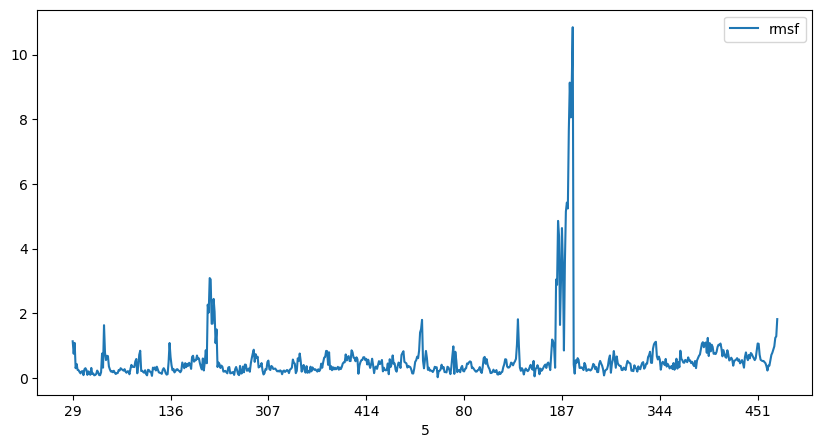

In [79]:
df[[5, 'rmsf']].plot(kind='line', figsize=(10,5), x=5, y='rmsf')

In [80]:
df.to_csv('rmsf.csv')

In [14]:
# [추가로 작업해 볼 것]
# 여집합 구하기 (빠진 것 프린트) merge how='outer'로 해서 교집합이 안되는 게 있으면 어떻게 되나? -> res.num이랑 res.name으로 drop dup한 다음 -> 머지한 다음 차이나는 것 프린트 
# Heavy atom 기준으로도 구해주기 
# 다른 단백질들 align되었을 때 seq align된 것 기준으로 계산하는 방법 알아보기 